In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [22]:
atlas = 'schaefer' # schaefer or dk

data_path = 'new/'

# Loading the masks
Ce_mask = pd.read_csv(data_path+f'{atlas}_exc_mask.csv', index_col=0).values
Ci_mask = pd.read_csv(data_path+f'{atlas}_inh_mask.csv', index_col=0).values
Cd_mask = pd.read_csv(data_path+f'{atlas}_dopa_mask.csv', index_col=0).values

# Loading and normalizing the weights
weights = pd.read_csv(data_path+f'{atlas}_weights_with_dopa.csv', index_col=0)
regions_names = list(weights.index)
weights = (weights/np.max(weights)).values

# Augmenting VTA weights
Ce = weights * Ce_mask
Ce[regions_names.index('Left-VTA')] *= 1.5
Ce[regions_names.index('Right-VTA')] *= 1.5

Cd = weights * Cd_mask

Ci = weights * Ci_mask

FileNotFoundError: [Errno 2] No such file or directory: 'new/schaefer_exc_mask.csv'

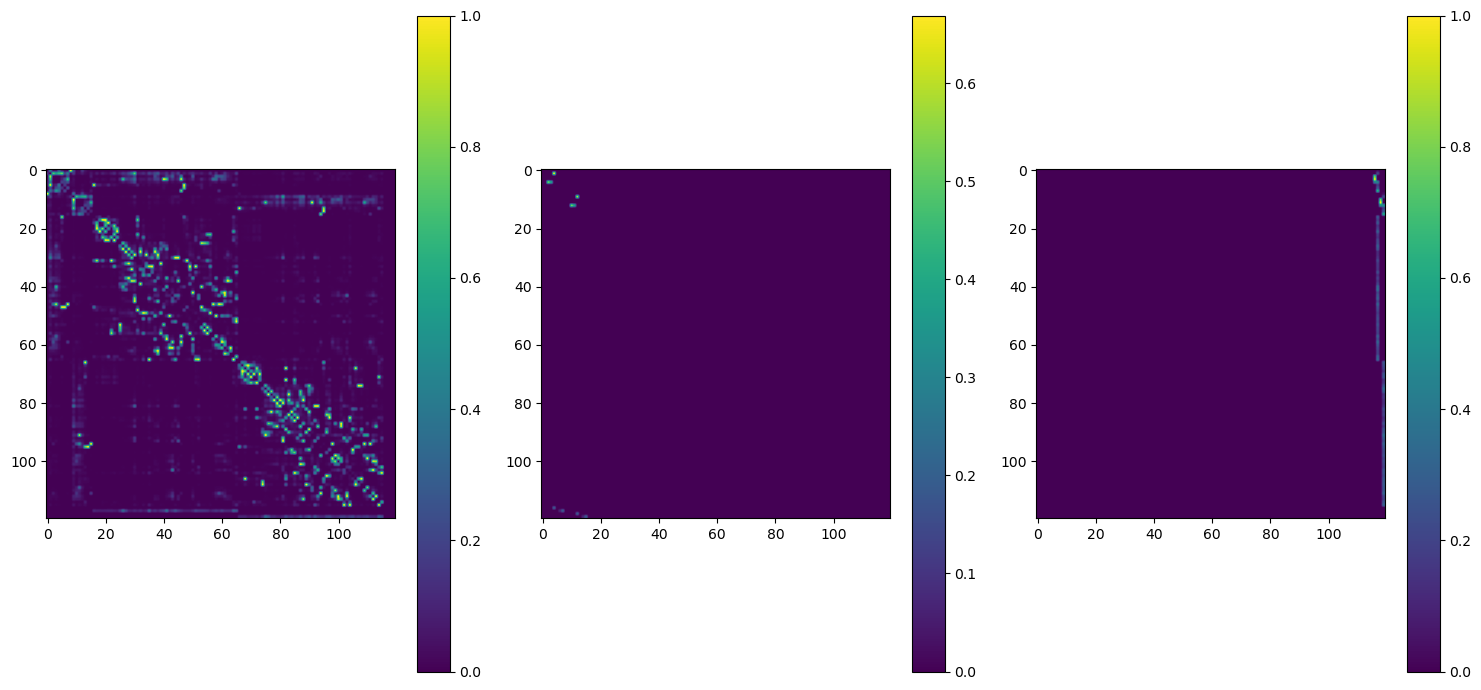

In [7]:
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.imshow(Ce)
plt.colorbar()
plt.subplot(132)
plt.imshow(Ci)
plt.colorbar()
plt.subplot(133)
plt.imshow(Cd)
plt.colorbar()
plt.tight_layout()

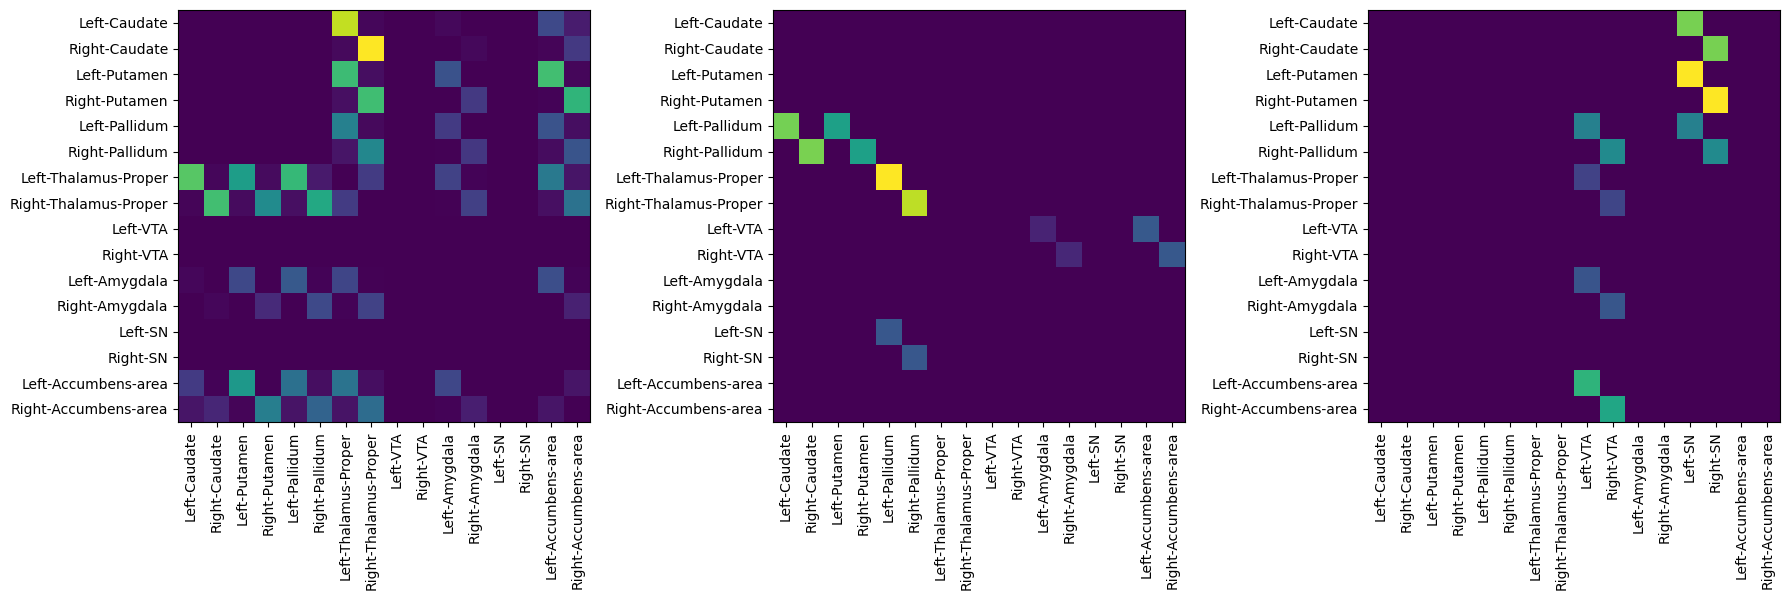

In [9]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Ce_reduced = Ce[rois_idx, :][:, rois_idx]
Ci_reduced = Ci[rois_idx, :][:, rois_idx]
Cd_reduced = Cd[rois_idx, :][:, rois_idx]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Ce_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(132)
plt.imshow(Ci_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

In [21]:
# Modify the old connectivity 
# Adding inhibitory projections from N. Acc to VTA and Pallidum
Ci_mask_m = Ci_mask
Ci_mask_m[regions_names.index('Left-VTA'), regions_names.index('Left-Accumbens-area')] = 1
Ci_mask_m[regions_names.index('Right-VTA'), regions_names.index('Right-Accumbens-area')] = 1
Ci_mask_m[regions_names.index('Left-Pallidum'), regions_names.index('Left-Accumbens-area')] = 1
Ci_mask_m[regions_names.index('Right-Pallidum'), regions_names.index('Right-Accumbens-area')] = 1

inhibitory_regions = [regions_names[i] for i in np.unique(np.where(Ci_mask_m!=0)[1]) if i not in ['Left-Amygdala', 'Right-Amygdala']]
inhibitory_regions_idx = [regions_names.index(i) for i in inhibitory_regions]

# Resetting to 0 dopamine projections from SN to Pallidum
Cd_mask_m = Cd_mask
Cd_mask_m[regions_names.index('Left-Pallidum'), regions_names.index('Left-SN')] = 0
Cd_mask_m[regions_names.index('Right-Pallidum'), regions_names.index('Right-SN')] = 0

# Resetting excitatory projections to the pallidum
Ce_mask_m = Ce_mask
Ce_mask_m[regions_names.index('Left-Pallidum'), :] = 1
Ce_mask_m[regions_names.index('Right-Pallidum'), :] = 1

# Resetting to 0 weird excitatory connections from the dopaminergic nuclei to the 
Ce_mask_m[regions_names.index('Right-Pallidum'), regions_names.index('Right-SN')] = 0
Ce_mask_m[regions_names.index('Right-Pallidum'), regions_names.index('Right-VTA')] = 0
Ce_mask_m[regions_names.index('Left-Pallidum'), regions_names.index('Left-SN')] = 0
Ce_mask_m[regions_names.index('Left-Pallidum'), regions_names.index('Left-VTA')] = 0

# Setting all possible excitatory projections from inhibitory nuclei to 0 (except the amygdala)
Ce_mask_m[:,inhibitory_regions_idx] = 0

Cem = Ce_mask_m * weights
Cem[regions_names.index('Left-VTA')] *= 1.5
Cem[regions_names.index('Right-VTA')] *= 1.5
Cem = np.array(Cem)
Cim = Ci_mask_m * weights
Cdm = Cd_mask_m * weights

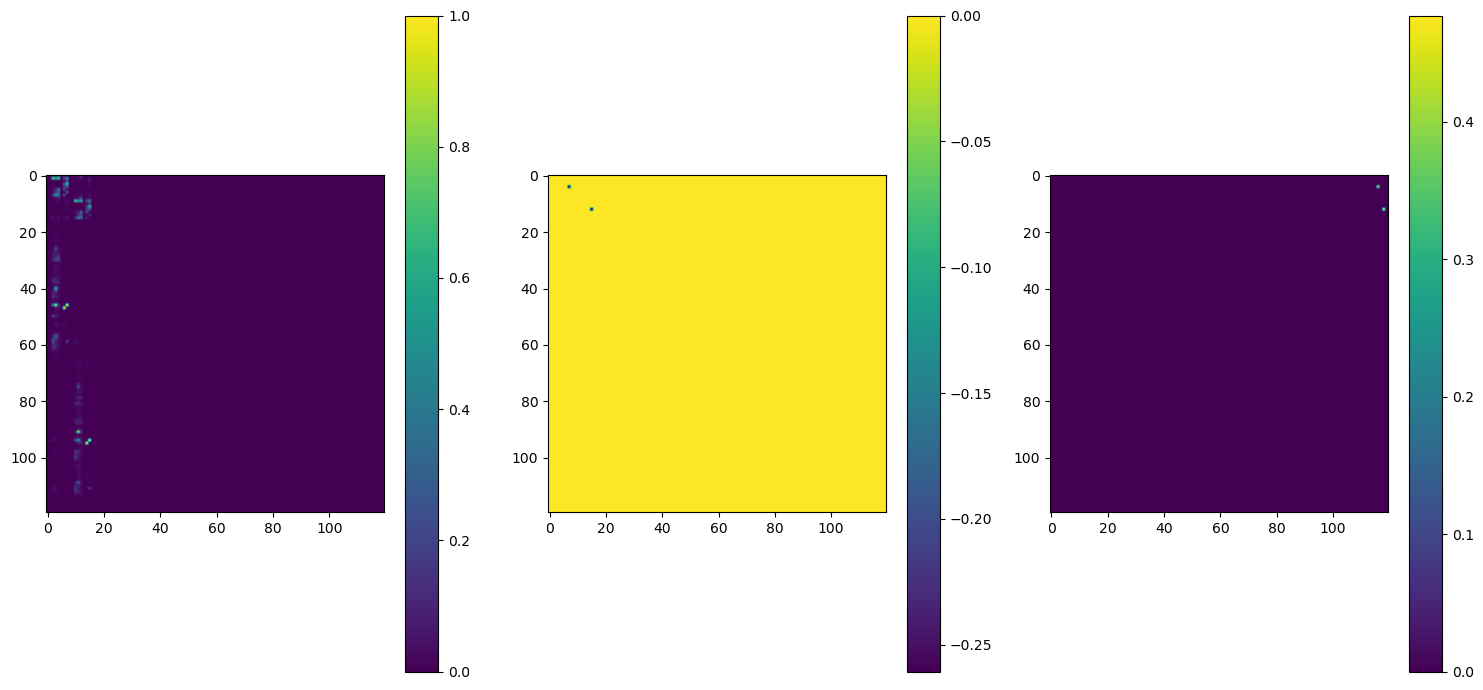

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.imshow(Ce-Cem)
plt.colorbar()
plt.subplot(132)
plt.imshow(Ci-Cim)
plt.colorbar()
plt.subplot(133)
plt.imshow(Cd-Cdm)
plt.colorbar()
plt.tight_layout()

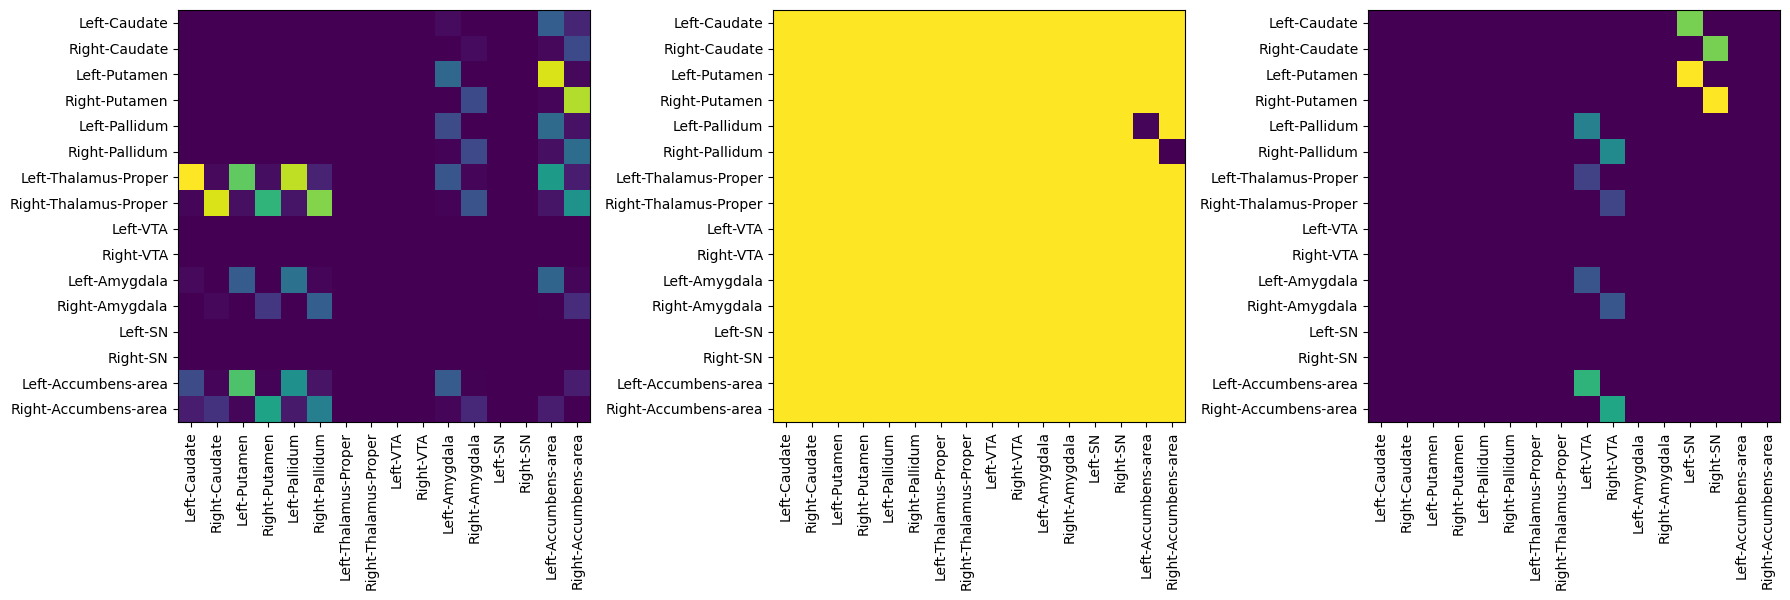

In [24]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Cem_reduced = Cem[rois_idx, :][:, rois_idx]
Cim_reduced = Cim[rois_idx, :][:, rois_idx]
Cdm_reduced = Cdm[rois_idx, :][:, rois_idx]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Ce_reduced - Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(132)
plt.imshow(Ci_reduced - Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

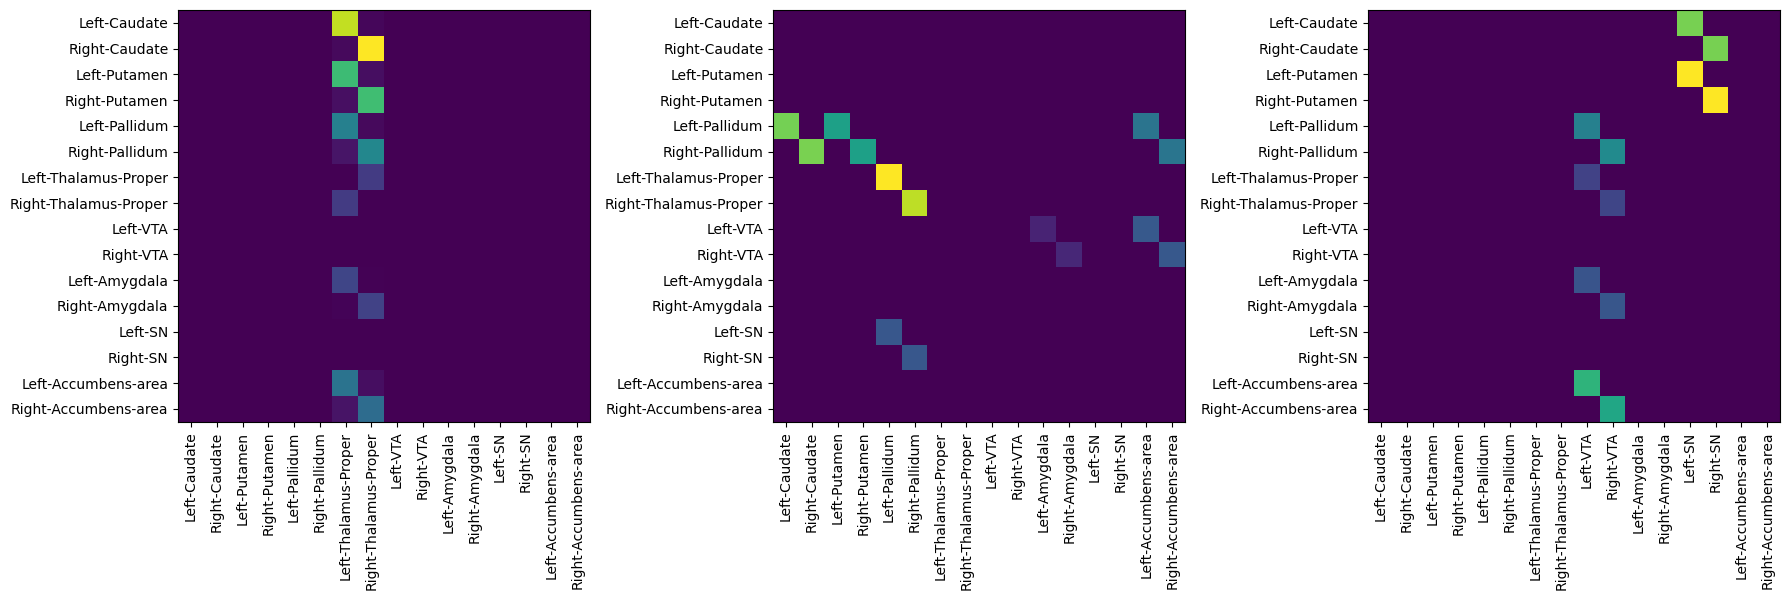

In [25]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(132)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(133)
plt.imshow(Cdm_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

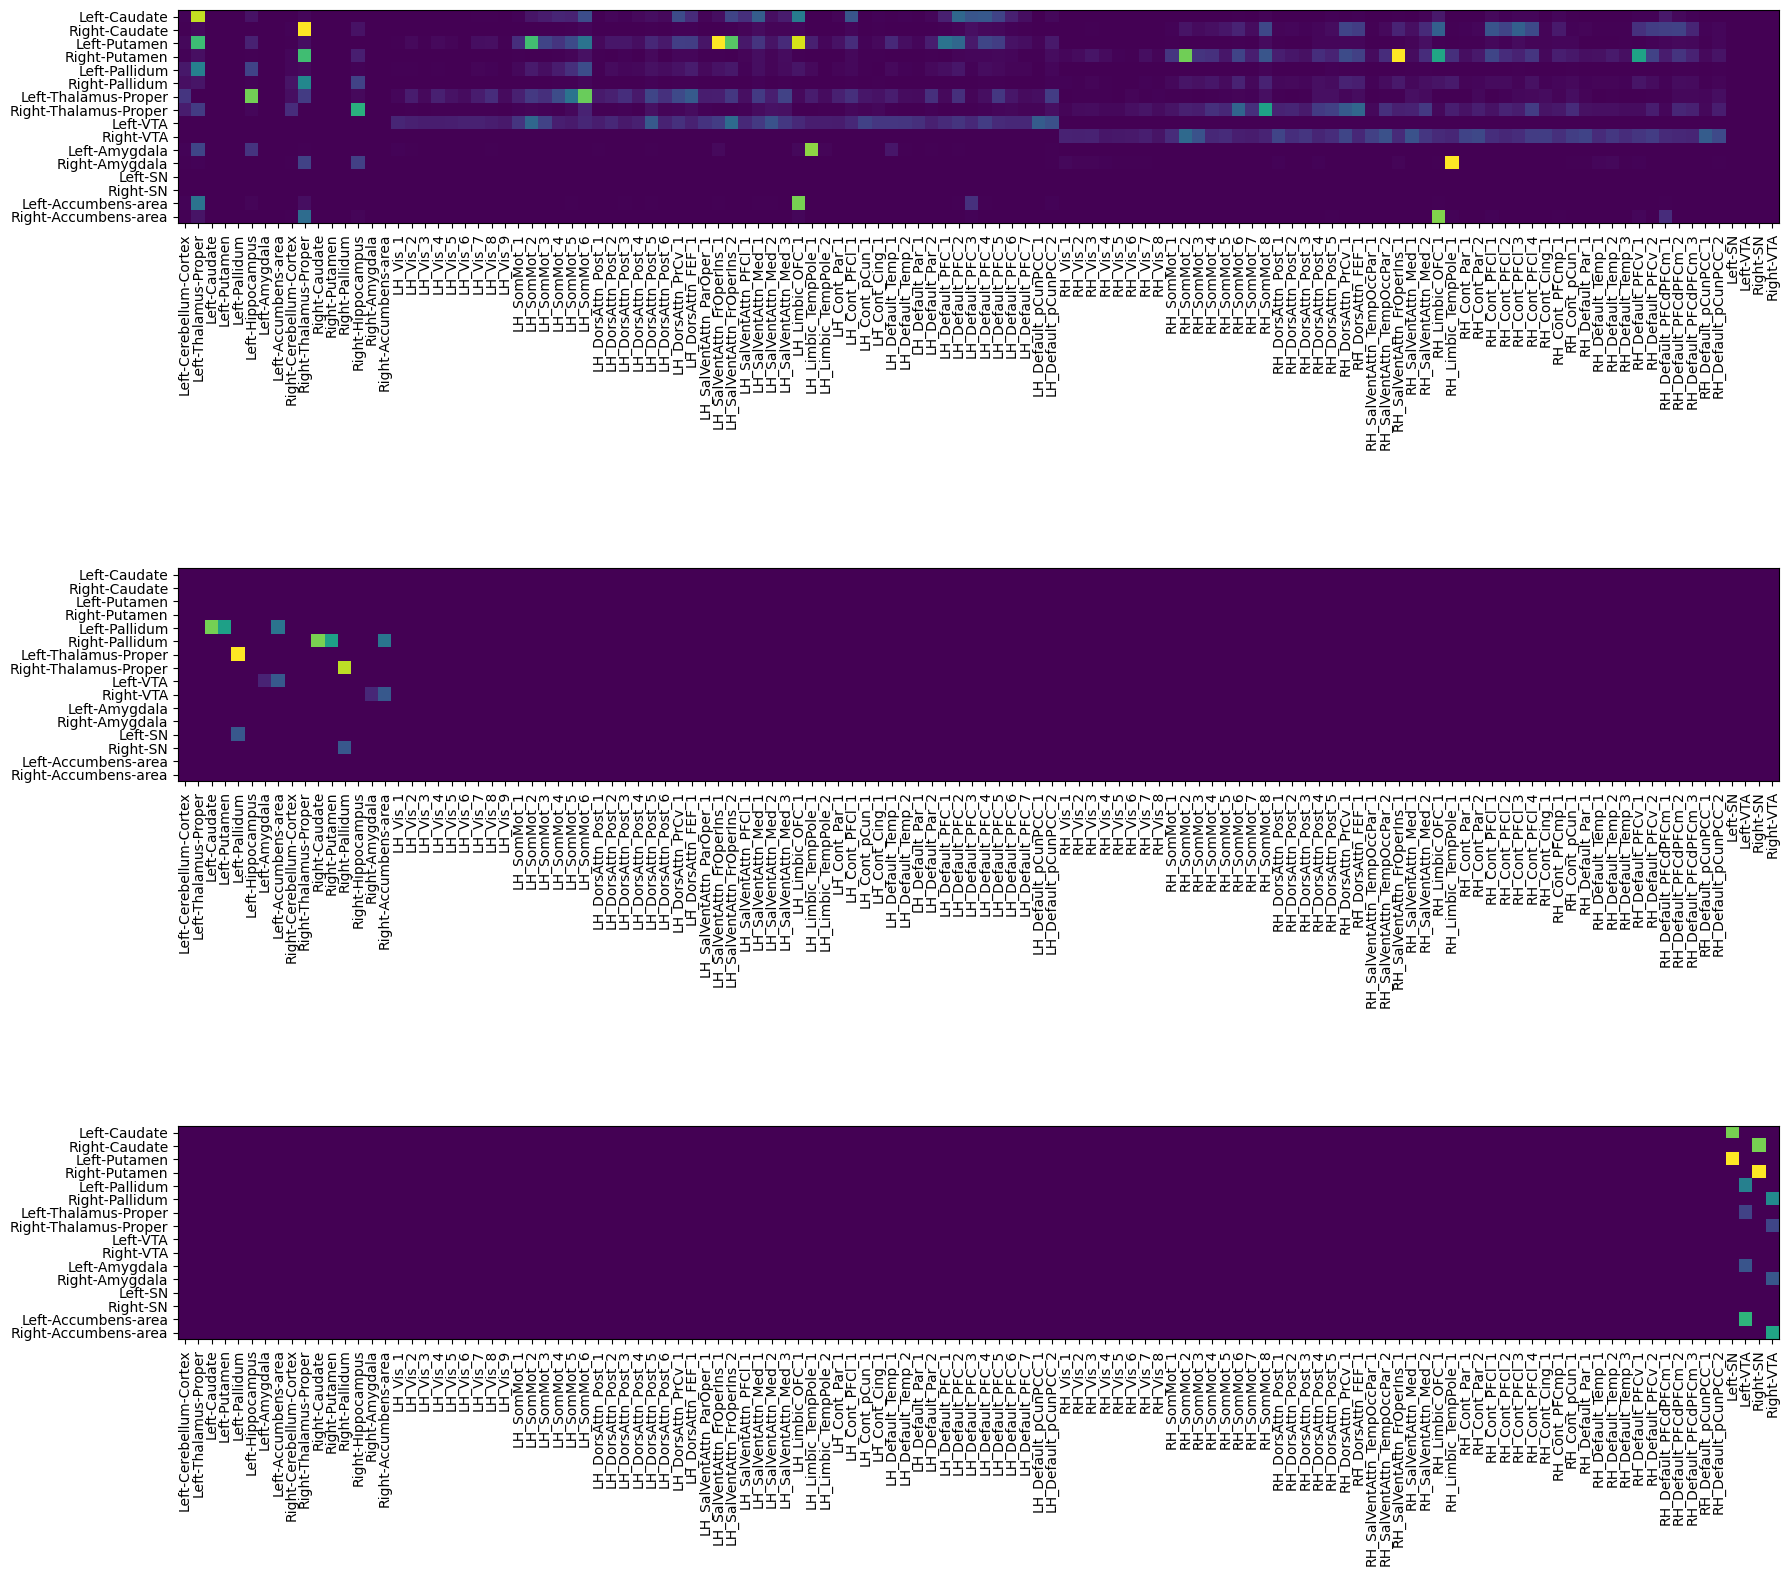

In [29]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Cem_reduced = Cem[rois_idx, :]
Cim_reduced = Cim[rois_idx, :]
Cdm_reduced = Cdm[rois_idx, :]

plt.figure(figsize=(18,18))
plt.subplot(311)
plt.imshow(Cem_reduced)
plt.yticks(np.arange(len(rois)), rois)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.subplot(312)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(313)
plt.imshow(Cdm_reduced)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

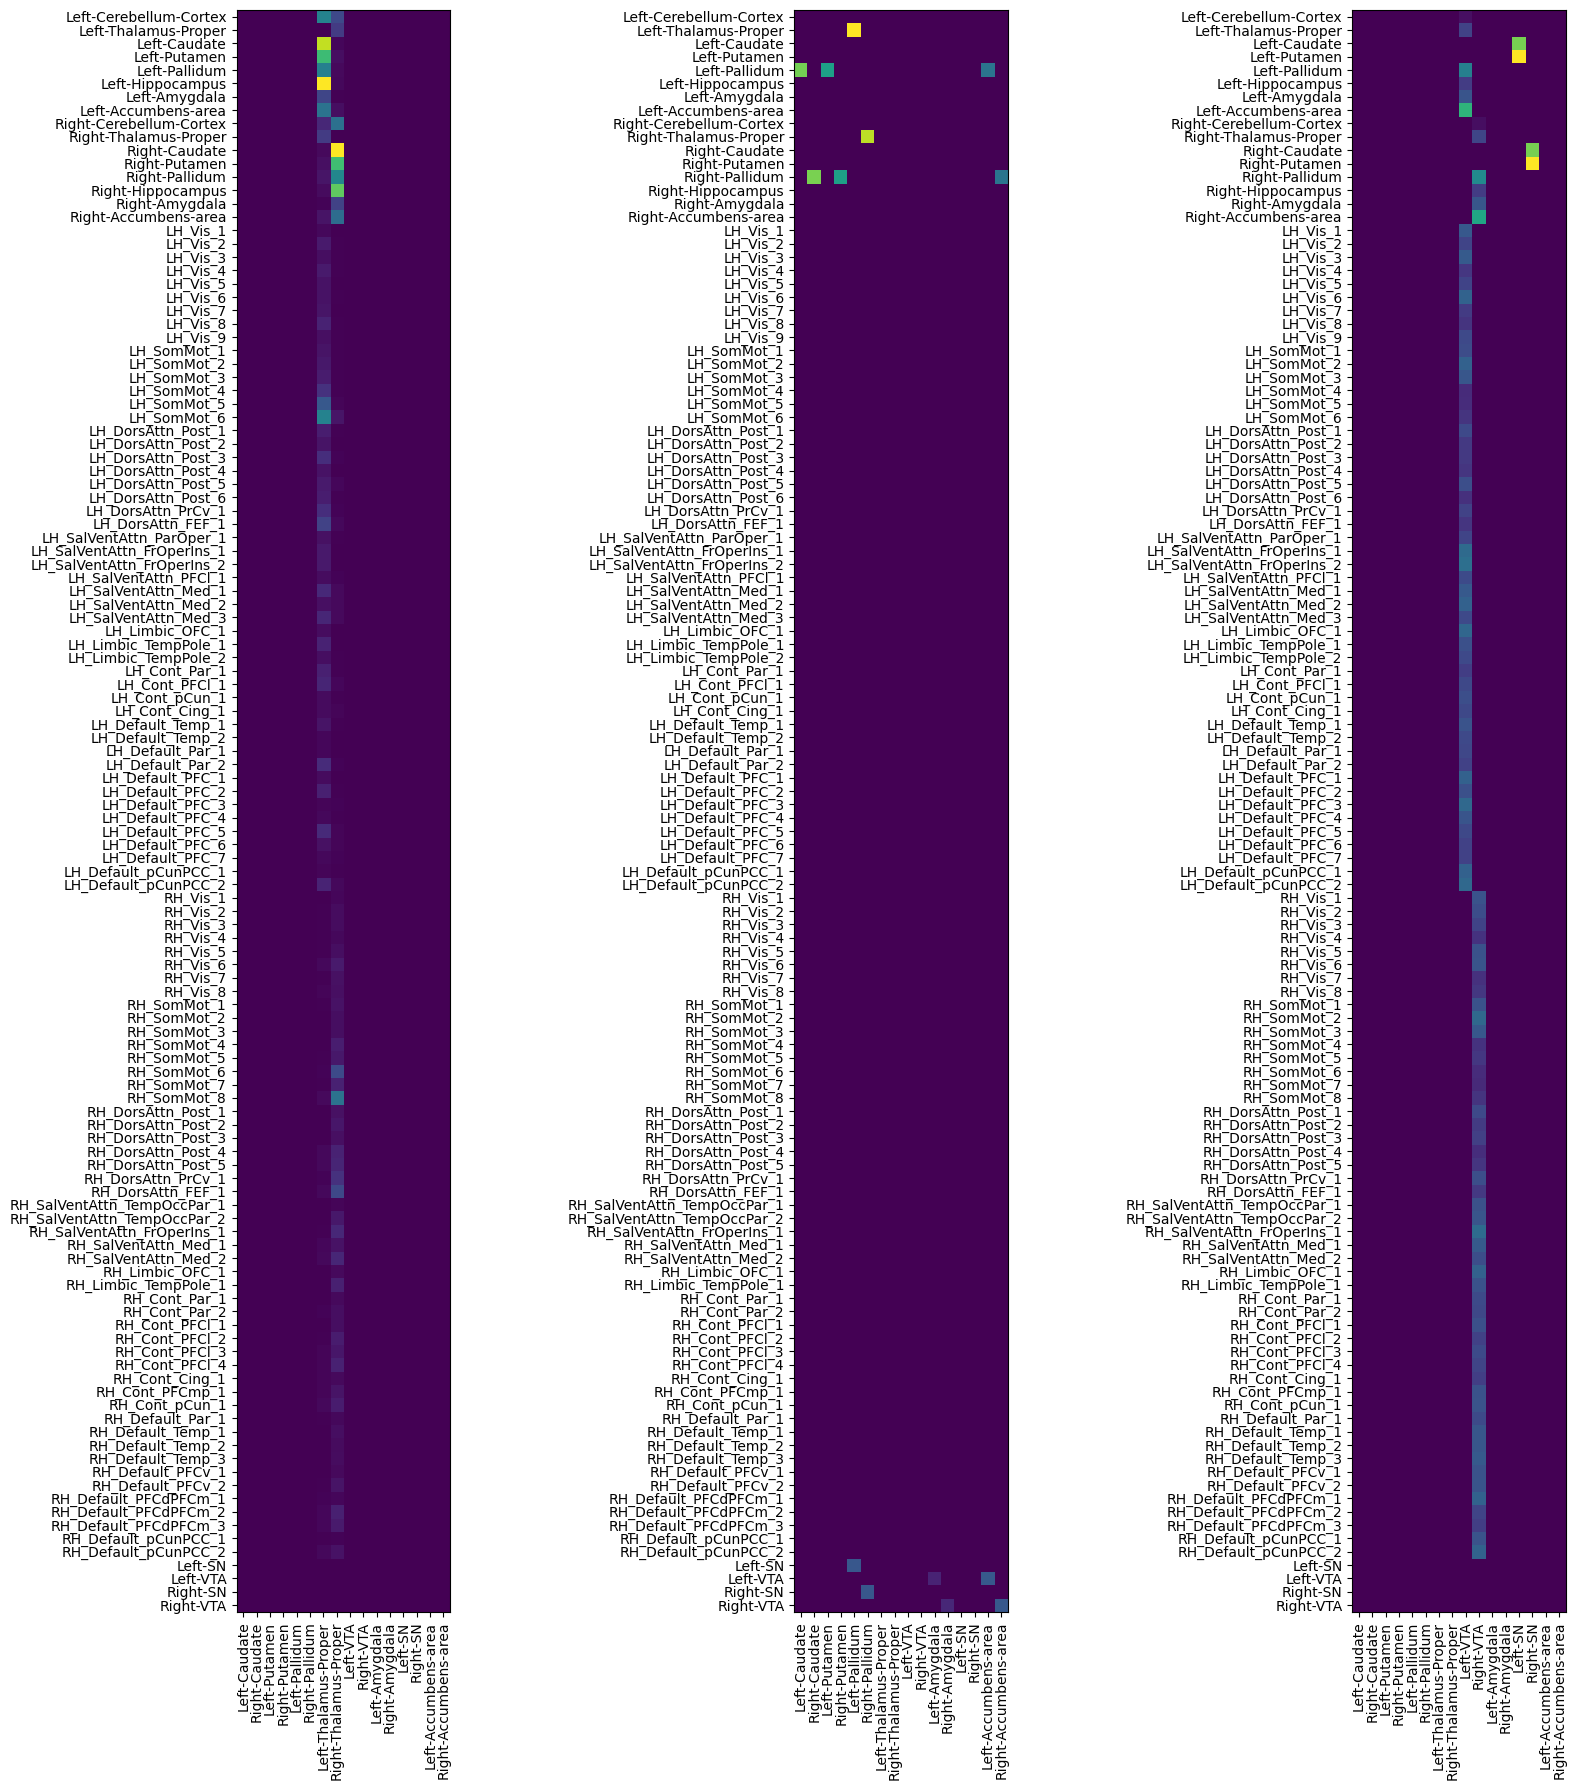

In [30]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Cem_reduced = Cem[:, rois_idx]
Cim_reduced = Cim[:, rois_idx]
Cd_reduced = Cdm[:, rois_idx]

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(132)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.tight_layout()

In [33]:
Ce_modified_mask = Cem != 0
Ci_modified_mask = Cim != 0
Cd_modified_mask = Cdm != 0

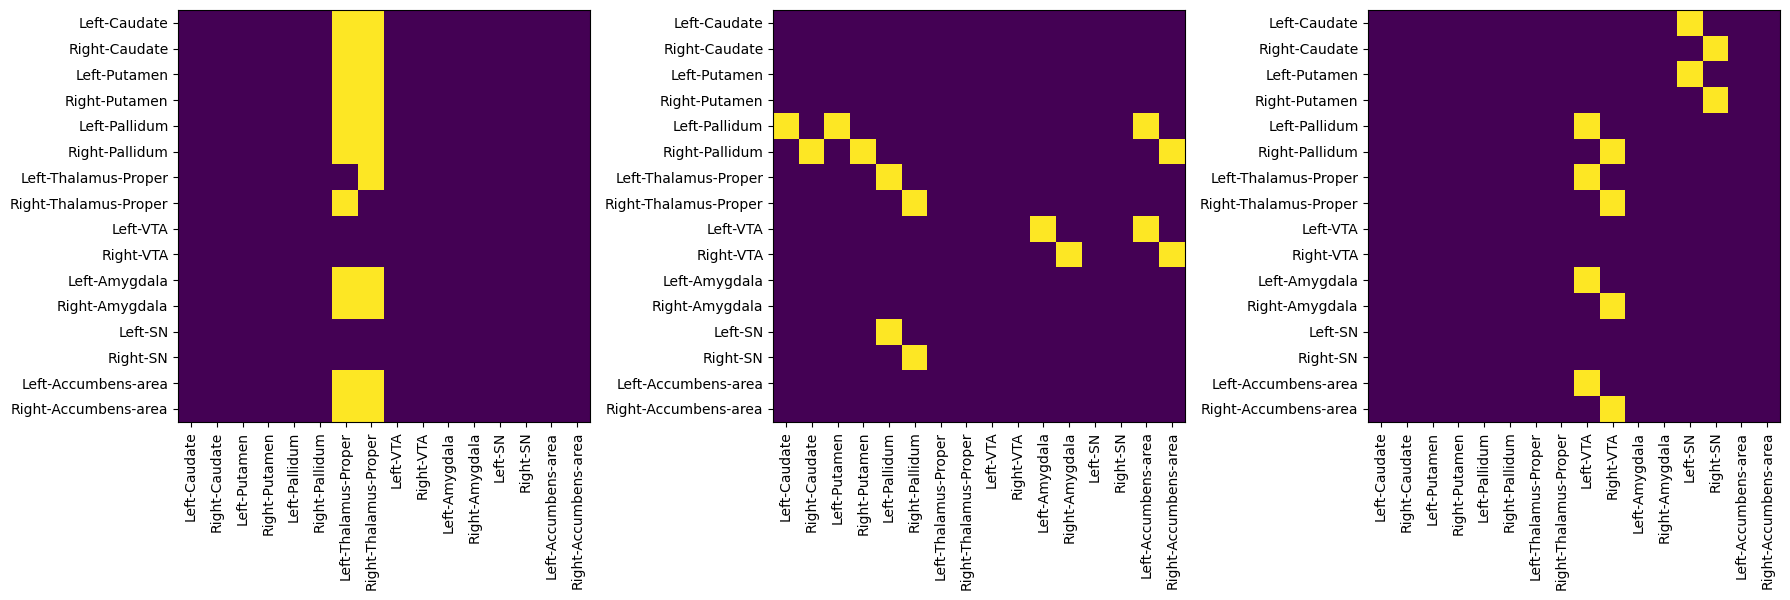

In [34]:
Cem_reduced = Ce_modified_mask[rois_idx, :][:, rois_idx]
Cim_reduced = Ci_modified_mask[rois_idx, :][:, rois_idx]
Cd_reduced = Cd_modified_mask[rois_idx, :][:, rois_idx]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(132)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

In [35]:
np.save('correct_masks_with_no_inhibitory_projections_to_cortex/schaefer_exc_mask.npy', Ce_modified_mask)
np.save('correct_masks_with_no_inhibitory_projections_to_cortex/schaefer_inh_mask.npy', Ci_modified_mask)
np.save('correct_masks_with_no_inhibitory_projections_to_cortex/schaefer_dopa_mask.npy', Cd_modified_mask)

In [53]:
Ce_modified_mask = np.load('schaefer_exc_mask.npy')
Ci_modified_mask = np.load('schaefer_inh_mask.npy')
Cd_modified_mask = np.load('schaefer_dopa_mask.npy')

In [58]:
# Adjust the amygdala
Ce_modified_mask[:, regions_names.index('Left-Amygdala')] = 1
Ce_modified_mask[:, regions_names.index('Right-Amygdala')] = 1 
Ce_modified_mask[regions_names.index('Right-Amygdala'), regions_names.index('Right-Amygdala')] = 0
Ce_modified_mask[regions_names.index('Left-Amygdala'), regions_names.index('Left-Amygdala')] = 0
Ce_modified_mask[regions_names.index('Right-SN'), regions_names.index('Right-Amygdala')] = 0
Ce_modified_mask[regions_names.index('Right-VTA'), regions_names.index('Right-Amygdala')] = 0
Ce_modified_mask[regions_names.index('Left-SN'), regions_names.index('Left-Amygdala')] = 0
Ce_modified_mask[regions_names.index('Left-VTA'), regions_names.index('Left-Amygdala')] = 0 
Ce_modified_mask[regions_names.index('Right-SN'), regions_names.index('Left-Amygdala')] = 0
Ce_modified_mask[regions_names.index('Right-VTA'), regions_names.index('Left-Amygdala')] = 0
Ce_modified_mask[regions_names.index('Left-SN'), regions_names.index('Right-Amygdala')] = 0
Ce_modified_mask[regions_names.index('Left-VTA'), regions_names.index('Right-Amygdala')] = 0 
Ce_modified_mask[regions_names.index('RH_Default_PFCv_1'), regions_names.index('Left-Thalamus-Proper')] = 1


In [59]:
np.save('schaefer_exc_mask.npy', Ce_modified_mask)
np.save('schaefer_inh_mask.npy', Ci_modified_mask)
np.save('schaefer_dopa_mask.npy', Cd_modified_mask)

In [77]:
Ce_modified_df = pd.DataFrame(Ce_modified_mask, columns=regions_names, index=regions_names)
Ci_modified_df = pd.DataFrame(Ci_modified_mask, columns=regions_names, index=regions_names)
Cd_modified_df = pd.DataFrame(Cd_modified_mask, columns=regions_names, index=regions_names)
Ce_modified_df.to_csv('schaefer_exc_mask.csv')
Ci_modified_df.to_csv('schaefer_inh_mask.csv')
Cd_modified_df.to_csv('schaefer_dopa_mask.csv')

In [32]:
# Loading and normalizing the weights
atlas = 'schaefer'
weights = pd.read_csv(f'{atlas}_weights_with_dopa.csv', index_col=0)
regions_names = list(weights.index)
weights = (weights/np.max(weights)).values

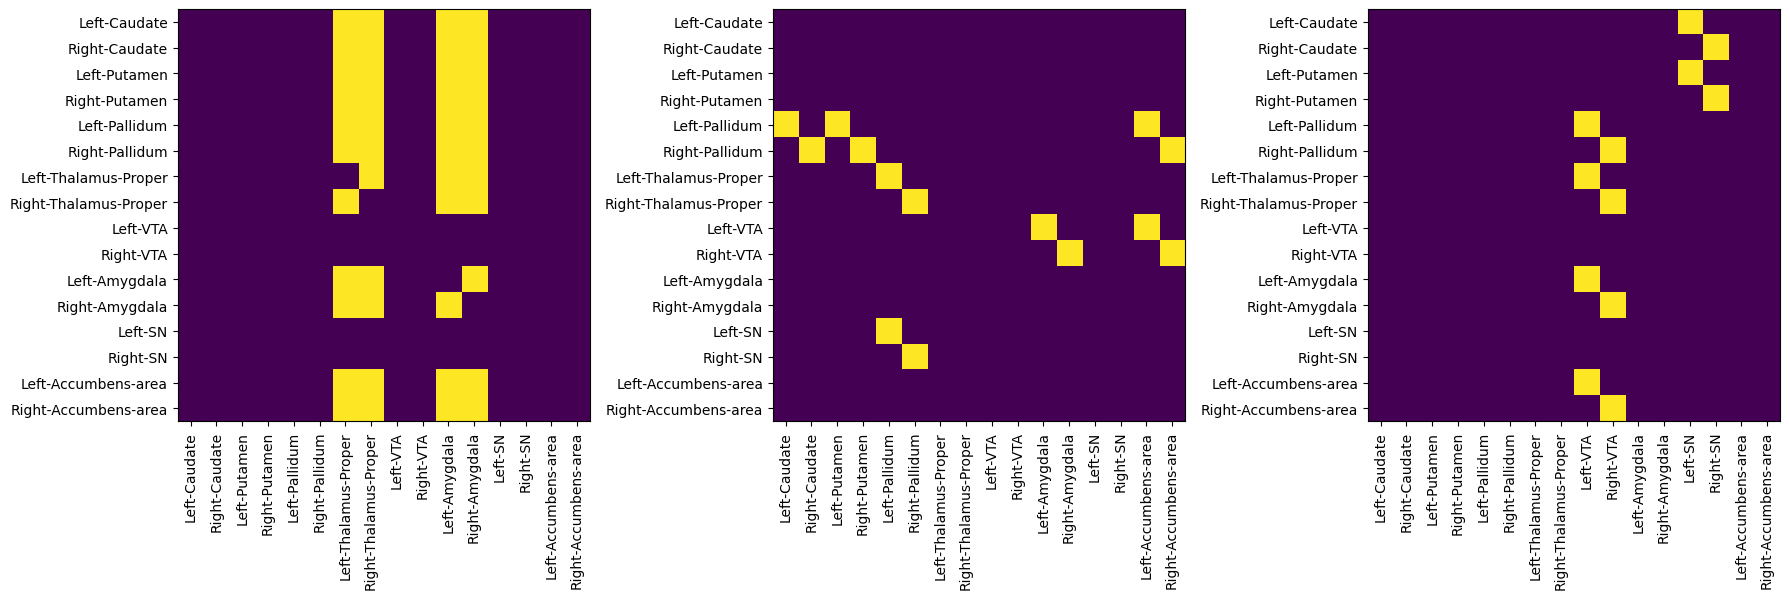

In [60]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Cem_reduced = Ce_modified_mask[rois_idx, :][:, rois_idx]
Cim_reduced = Ci_modified_mask[rois_idx, :][:, rois_idx]
Cd_reduced = Cd_modified_mask[rois_idx, :][:, rois_idx]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(132)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

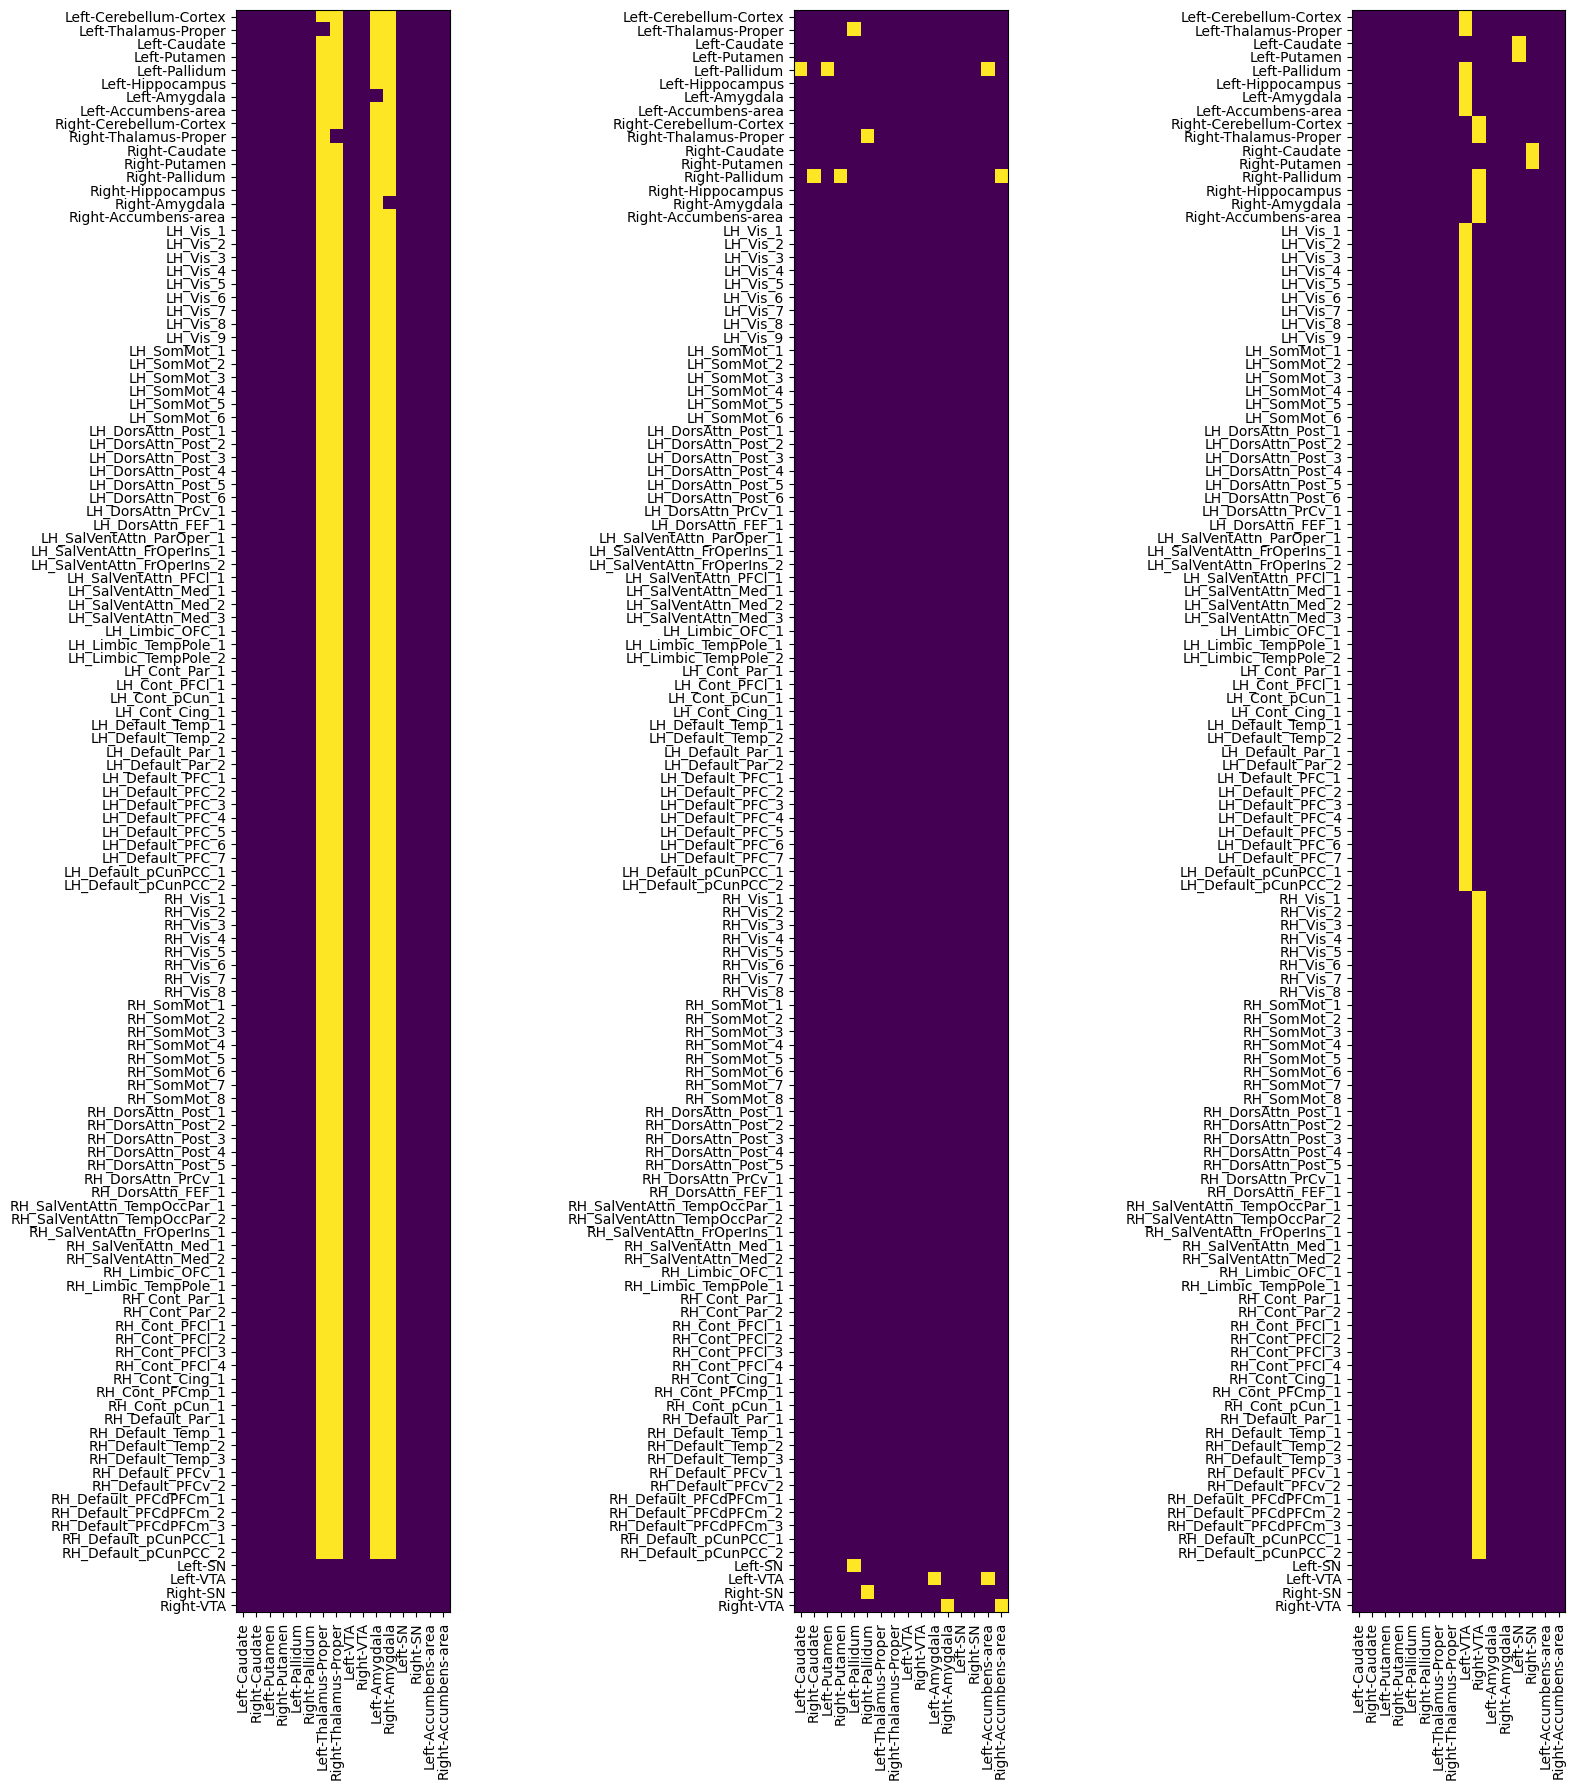

In [61]:
Cem_reduced = Ce_modified_mask[:, rois_idx]
Cim_reduced = Ci_modified_mask[:, rois_idx]
Cd_reduced = Cd_modified_mask[:, rois_idx]

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(132)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.tight_layout()

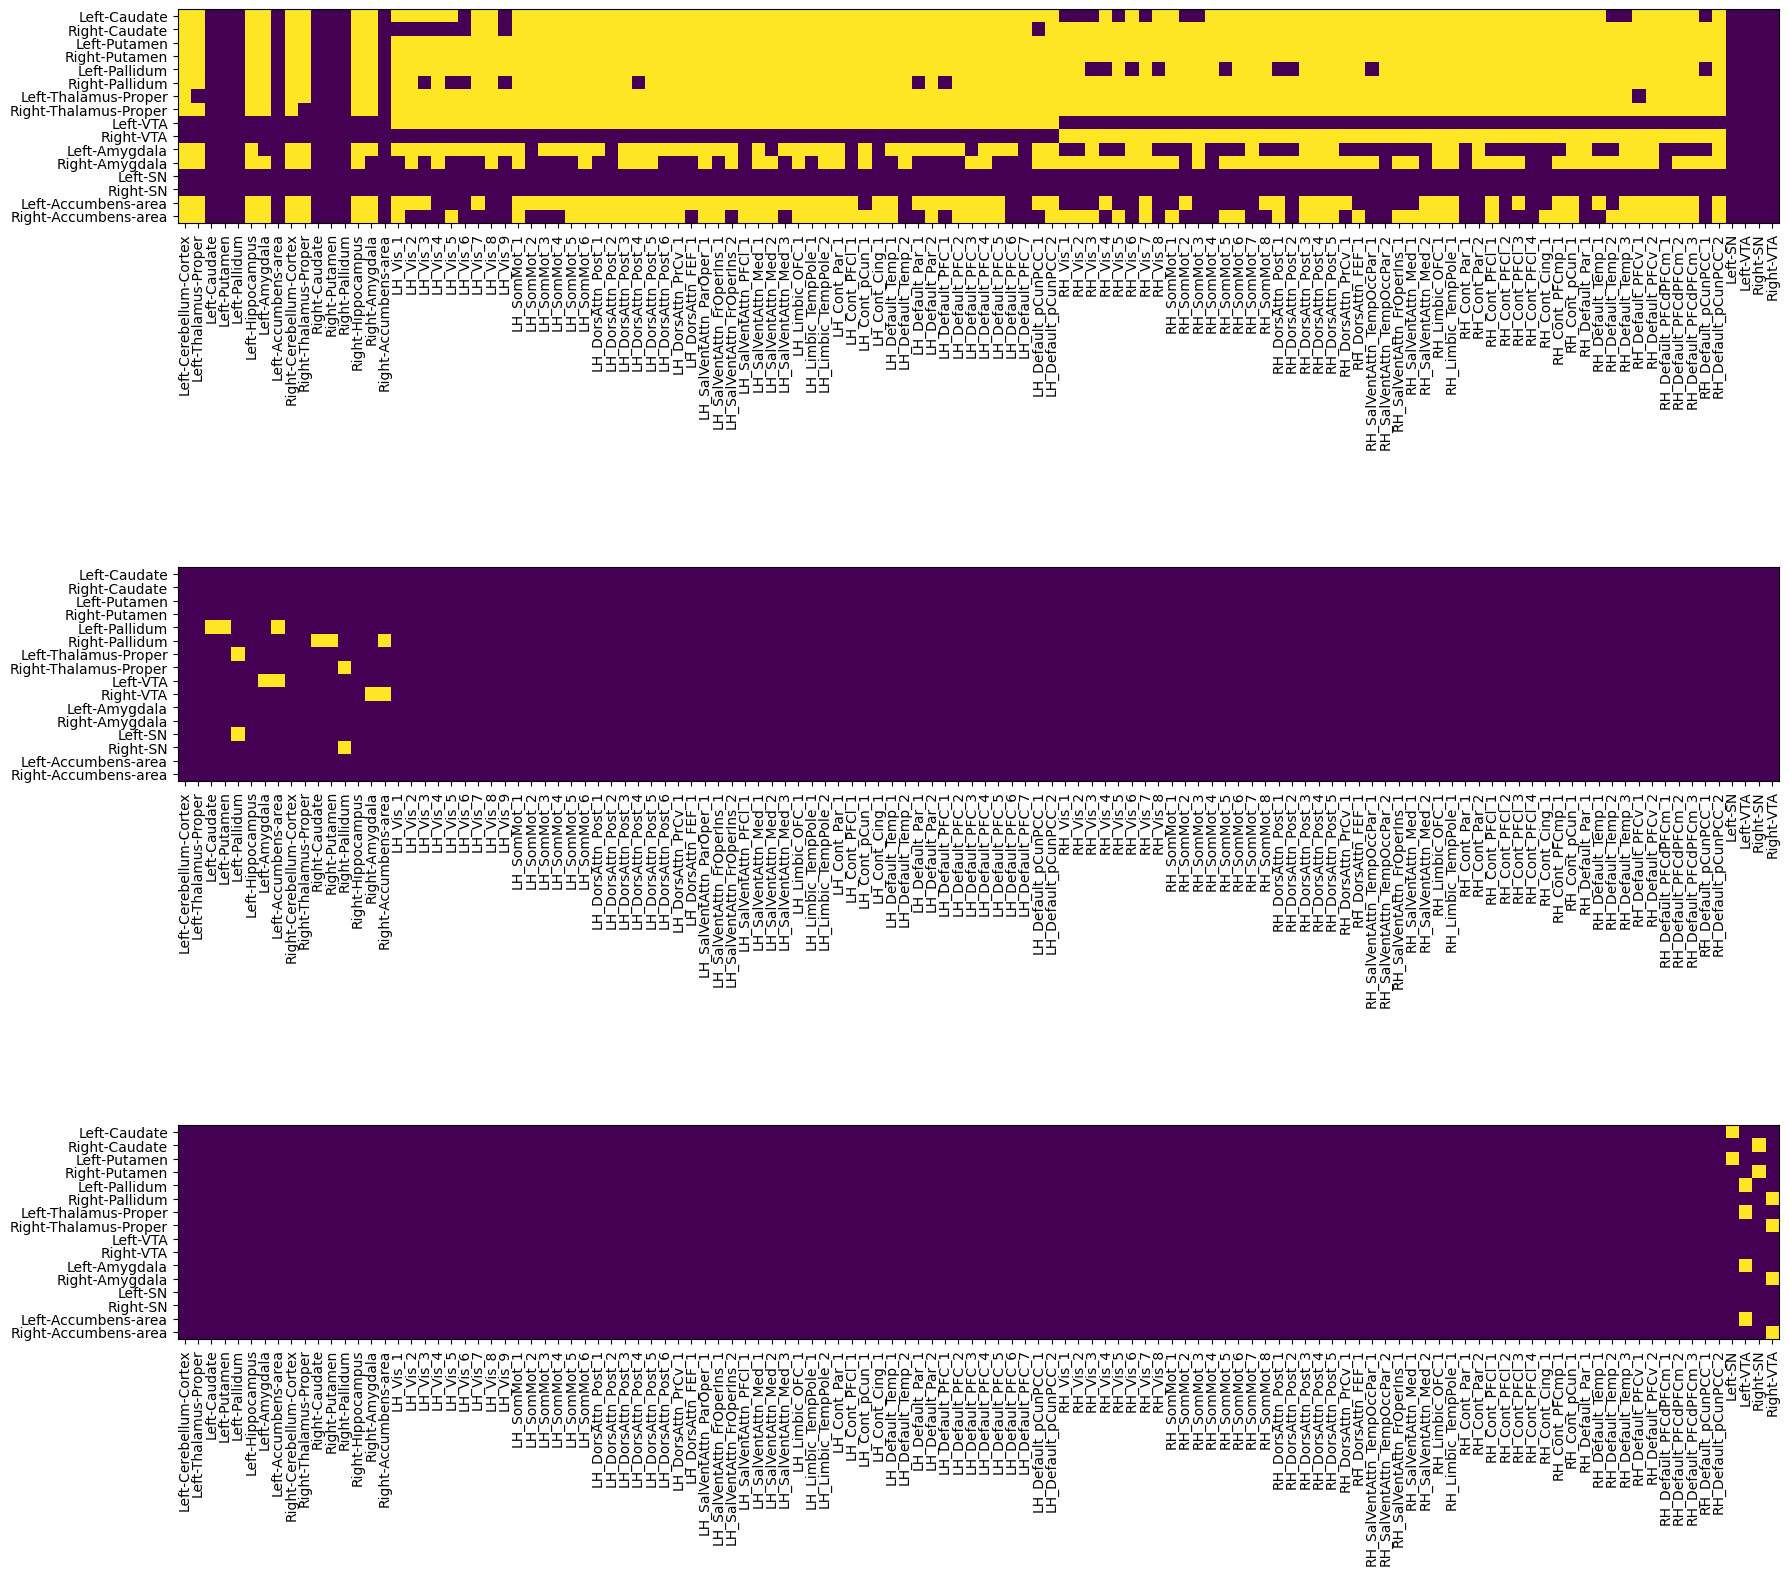

In [63]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Cem_reduced = Ce_modified_mask[rois_idx, :]
Cim_reduced = Ci_modified_mask[rois_idx, :]
Cdm_reduced = Cd_modified_mask[rois_idx, :]

plt.figure(figsize=(18,18))
plt.subplot(311)
plt.imshow(Cem_reduced)
plt.yticks(np.arange(len(rois)), rois)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.subplot(312)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(313)
plt.imshow(Cdm_reduced)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

In [65]:
atlas = 'schaefer' # schaefer or dk

data_path = ''

# Loading and normalizing the weights
weights = pd.read_csv(f'{atlas}_weights_with_dopa.csv', index_col=0)
regions_names = list(weights.index)
weights = (weights/np.max(weights)).values

# Augmenting VTA weights
Cem = weights * Ce_modified_mask
Cem[regions_names.index('Left-VTA')] *= 1.5
Cem[regions_names.index('Right-VTA')] *= 1.5

Cdm = weights * Cd_modified_mask

Cim = weights * Ci_modified_mask

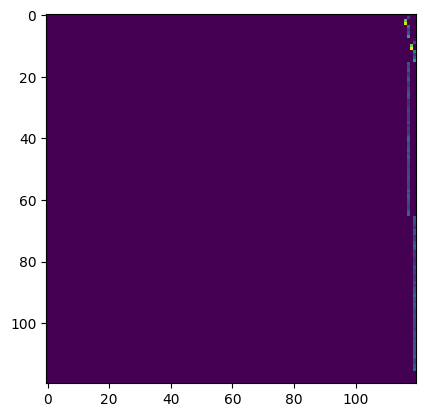

In [42]:
plt.imshow(Cdm)

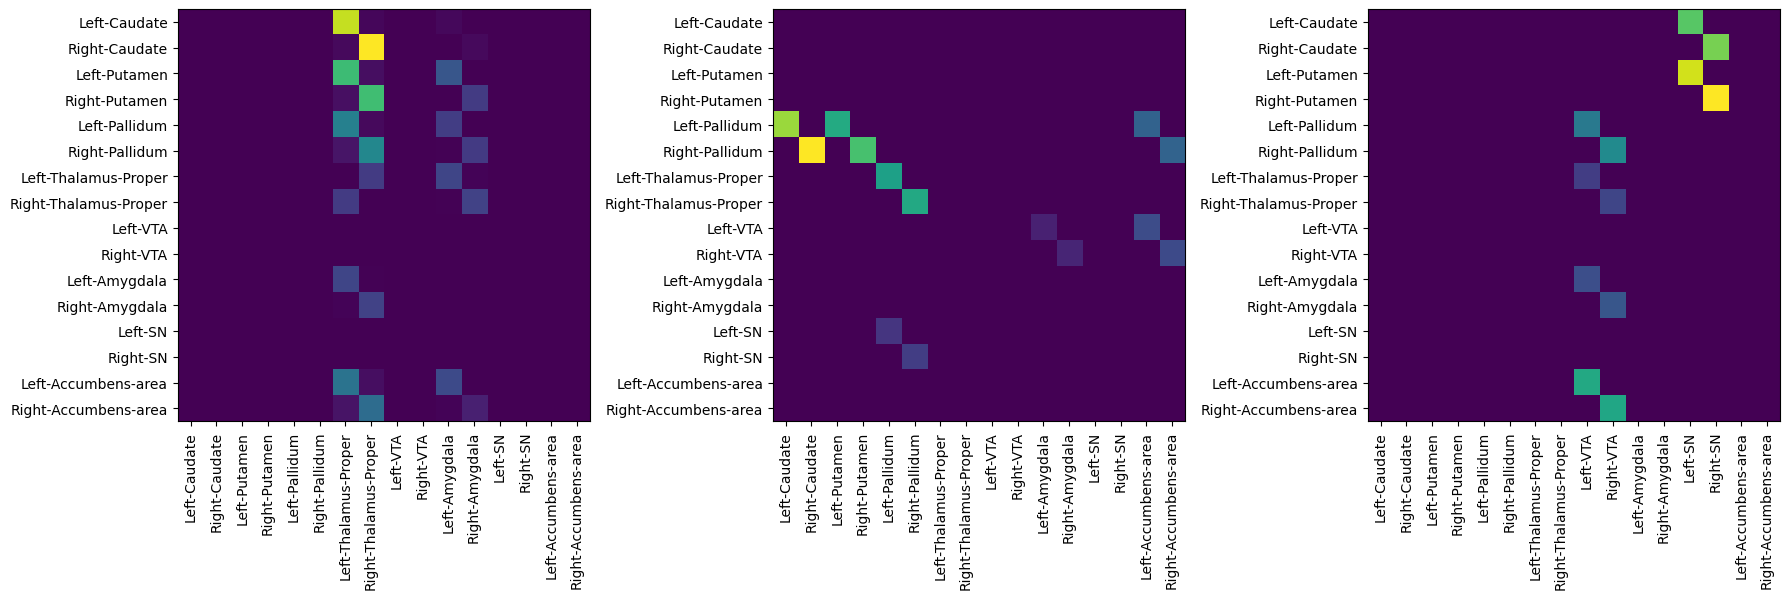

In [66]:
Ce_reduced = Cem[rois_idx, :][:, rois_idx]
Ci_reduced = Cim[rois_idx, :][:, rois_idx]
Cd_reduced = Cdm[rois_idx, :][:, rois_idx]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Ce_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(132)
plt.imshow(Ci_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

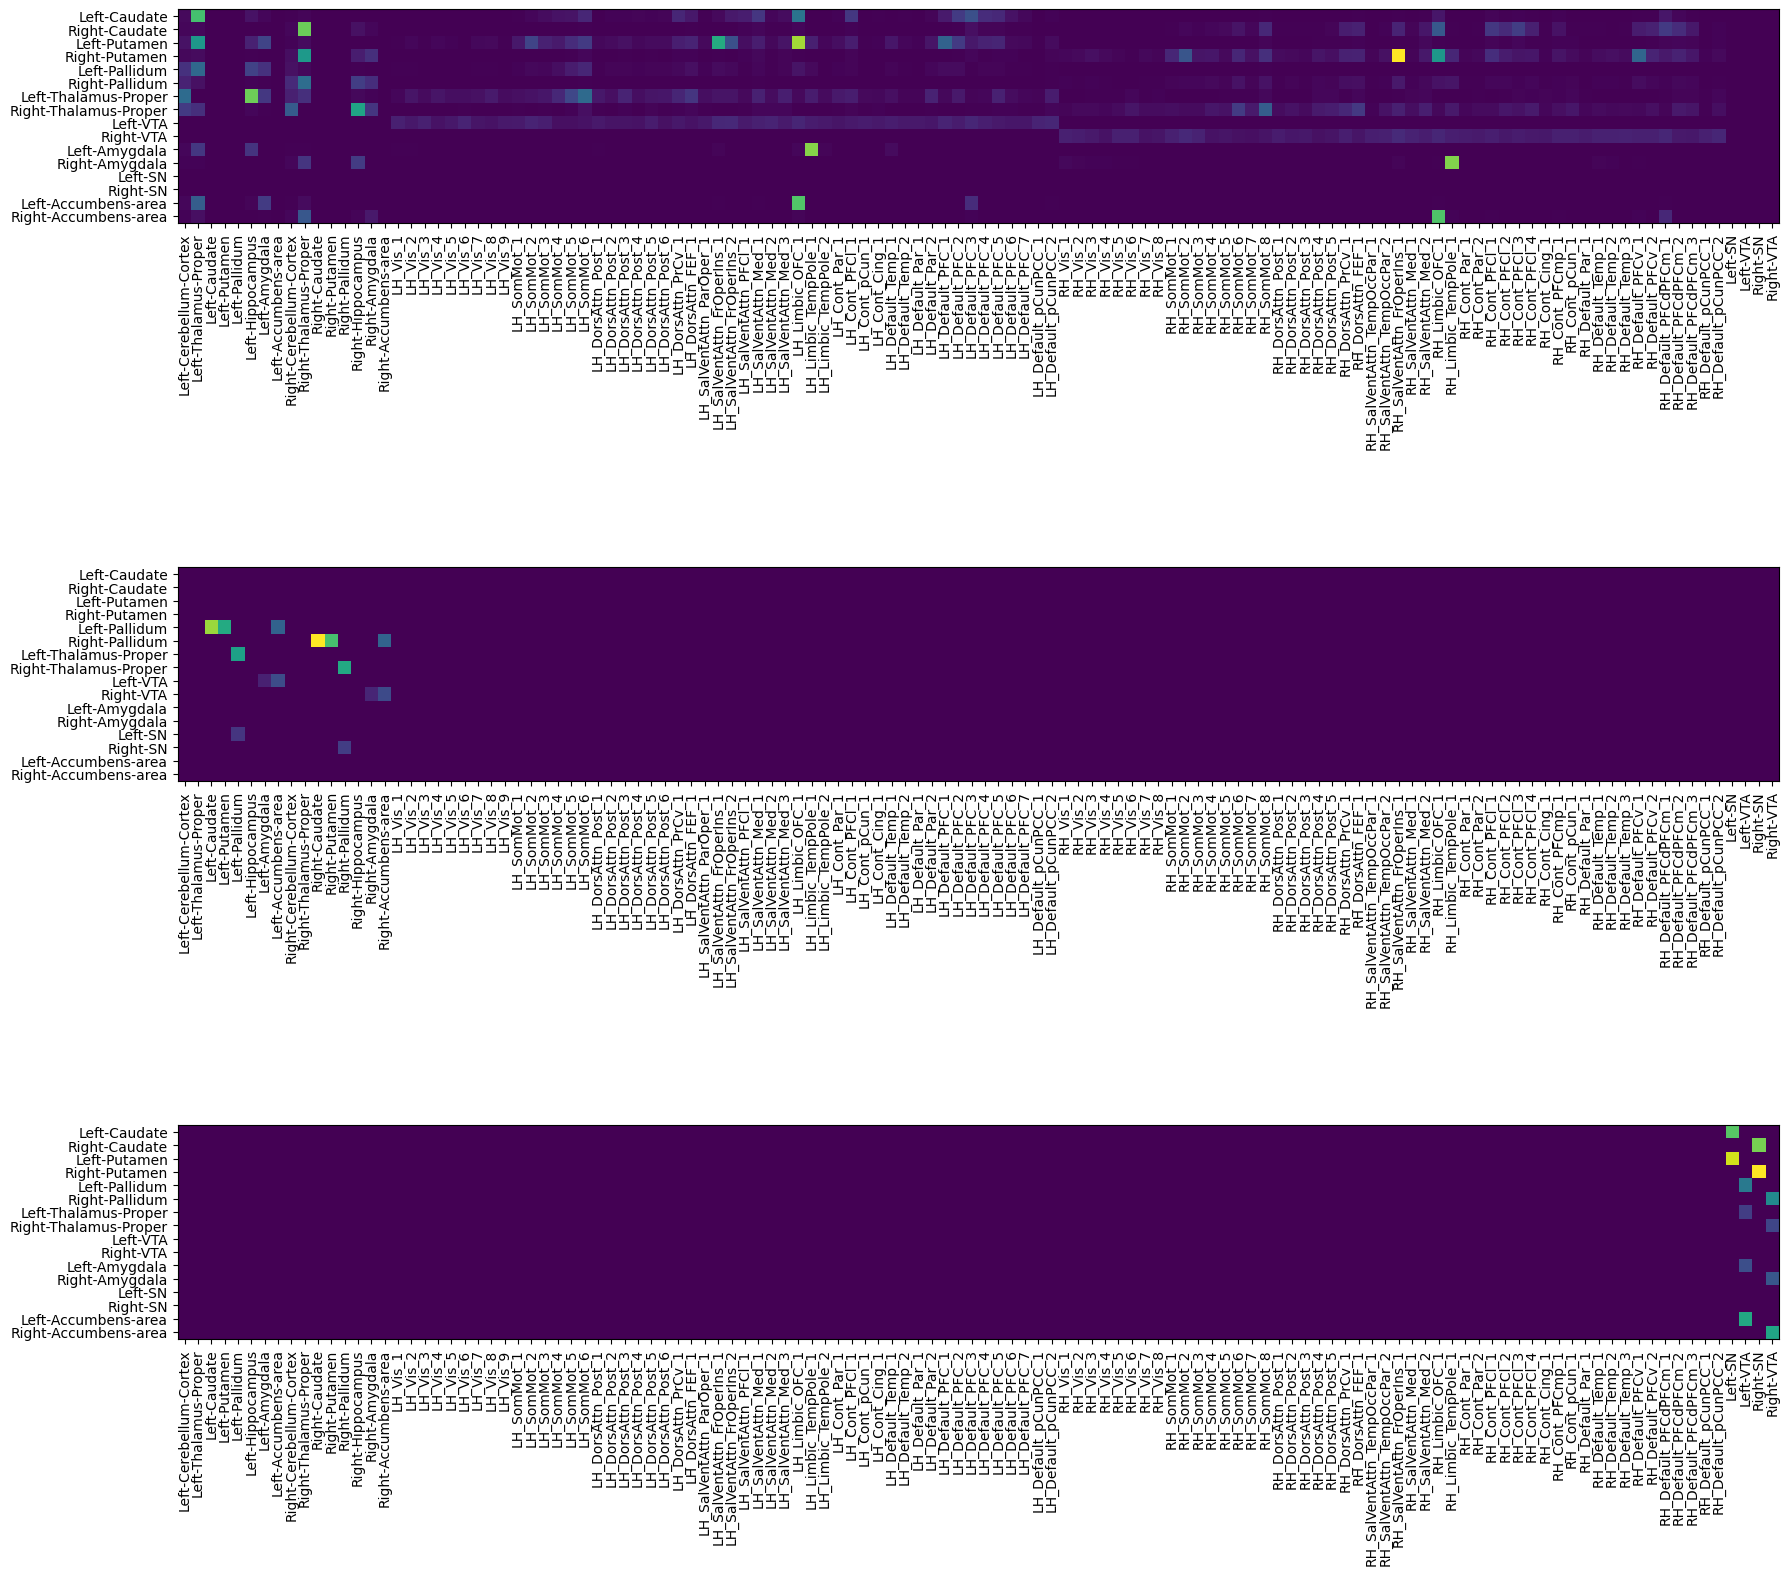

In [67]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Cem_reduced = Cem[rois_idx, :]
Cim_reduced = Cim[rois_idx, :]
Cdm_reduced = Cdm[rois_idx, :]

plt.figure(figsize=(18,18))
plt.subplot(311)
plt.imshow(Cem_reduced)
plt.yticks(np.arange(len(rois)), rois)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.subplot(312)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(313)
plt.imshow(Cdm_reduced)
plt.xticks(np.arange(len(regions_names)), regions_names, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

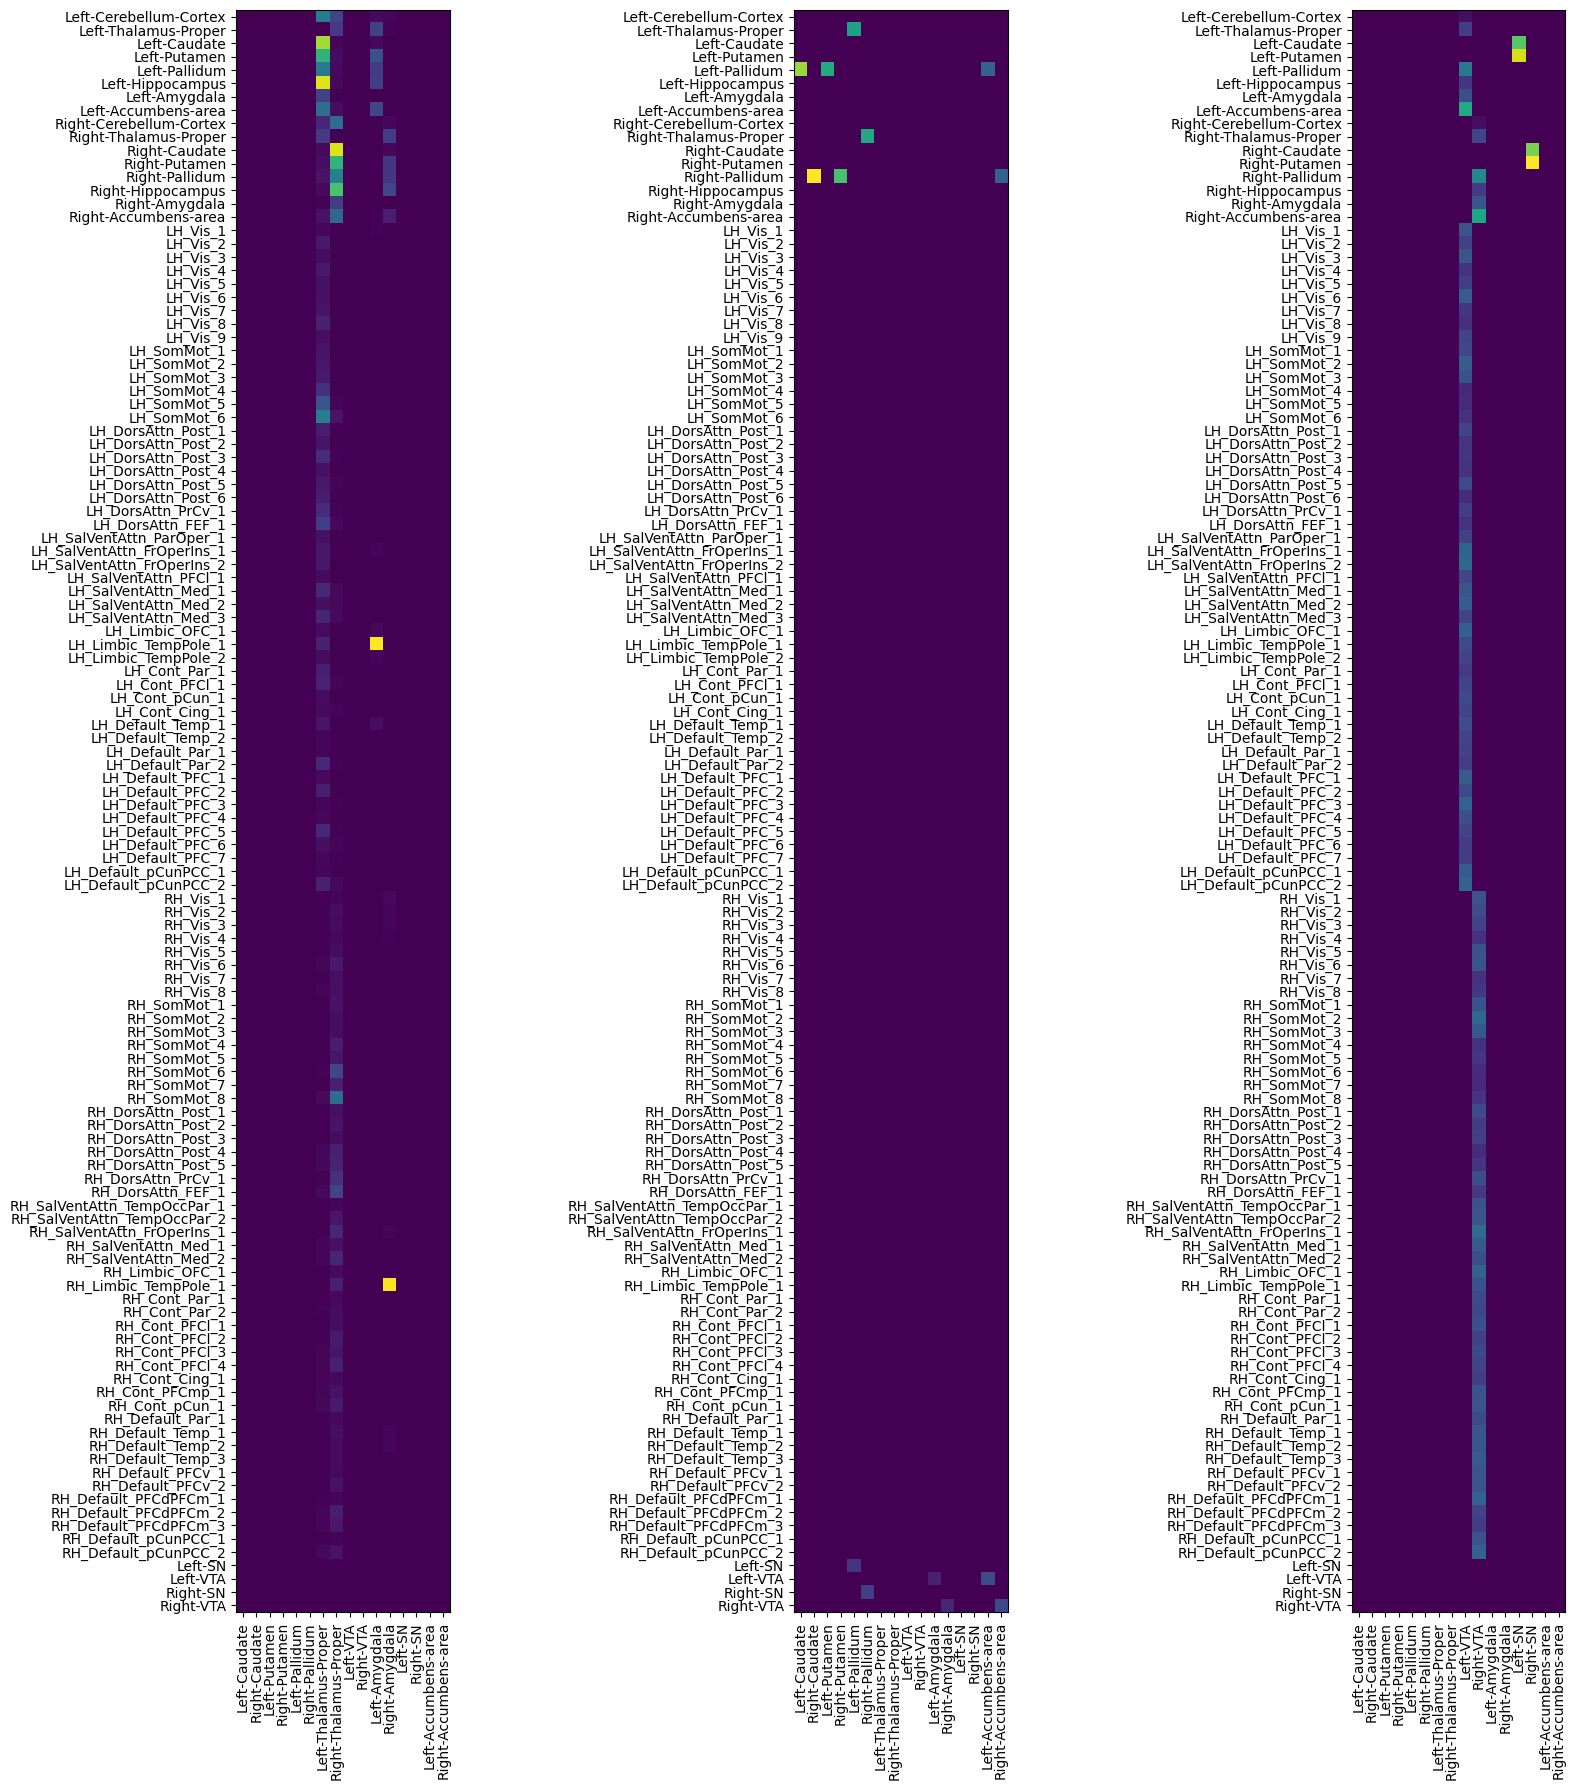

In [68]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Cem_reduced = Cem[:, rois_idx]
Cim_reduced = Cim[:, rois_idx]
Cd_reduced = Cdm[:, rois_idx]

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(132)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.tight_layout()

In [69]:
np.mean(Cem)

np.float64(0.009476126234281068)

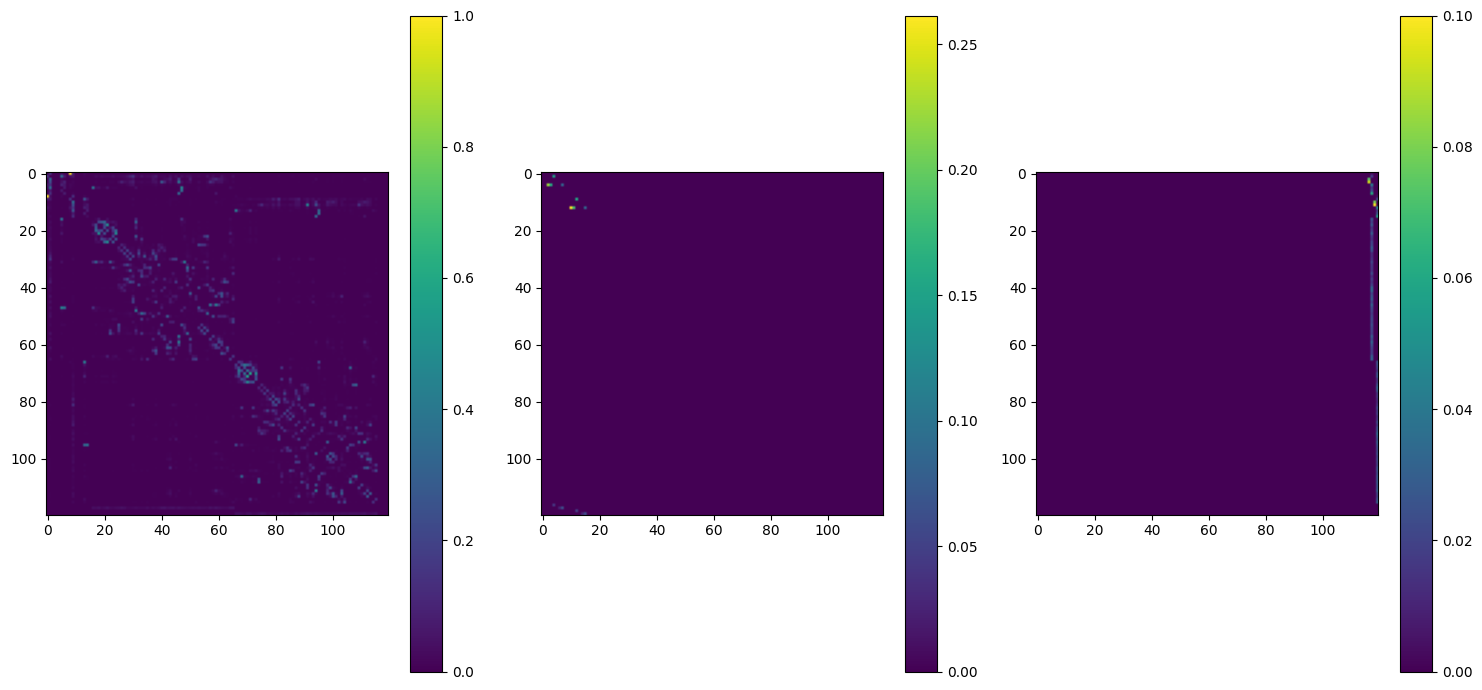

In [70]:
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.imshow(Cem)
plt.colorbar()
plt.subplot(132)
plt.imshow(Cim)
plt.colorbar()
plt.subplot(133)
plt.imshow(Cdm)
plt.colorbar()
plt.tight_layout()

In [71]:
np.save('schaefer_Ce.npy', Cem)
np.save('schaefer_Ci.npy', Cim)
np.save('schaefer_Cd.npy', Cdm)

In [72]:
Cem = np.load('schaefer_Ce.npy')
Cim = np.load('schaefer_Ci.npy')
Cdm = np.load('schaefer_Cd.npy')

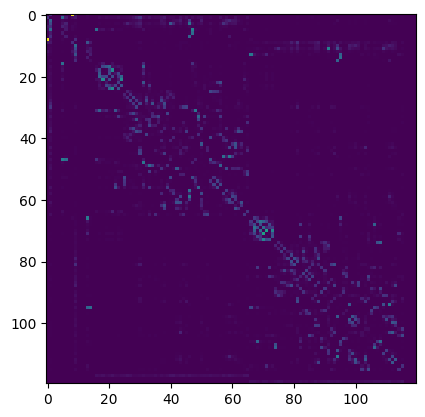

In [73]:
plt.imshow(Cem)

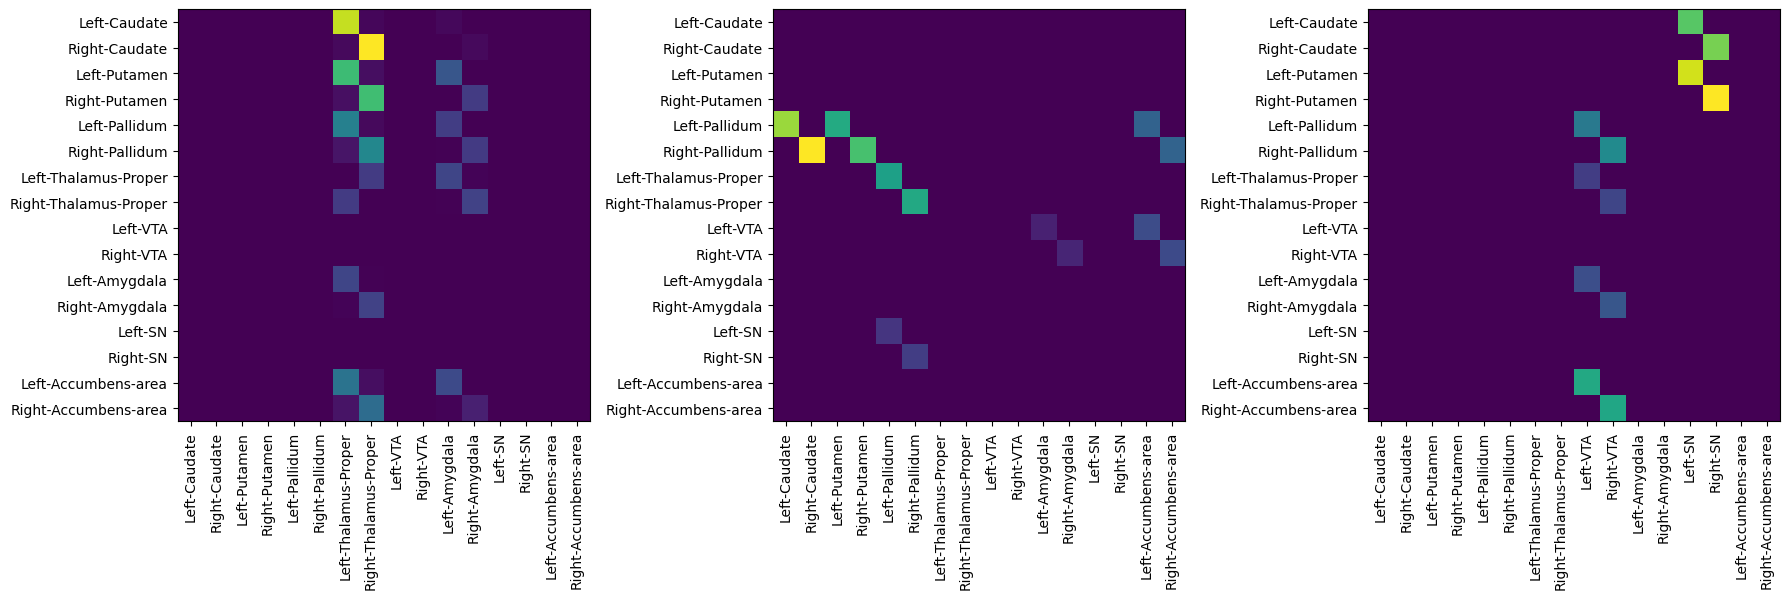

In [74]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Ce_reduced = Cem[rois_idx, :][:, rois_idx]
Ci_reduced = Cim[rois_idx, :][:, rois_idx]
Cd_reduced = Cdm[rois_idx, :][:, rois_idx]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Ce_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(132)
plt.imshow(Ci_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

In [78]:
Ce_modified_mask = np.load('schaefer_exc_mask.npy')
Ci_modified_mask = np.load('schaefer_inh_mask.npy')
Cd_modified_mask = np.load('schaefer_dopa_mask.npy')

In [102]:
Ce_mask_m = np.ones(Ce_modified_mask.shape)
np.fill_diagonal(Ce_mask_m, 0)

In [103]:
inhibitory_regions = [regions_names[i] for i in np.unique(np.where(Ci_modified_mask!=0)[1])]
inhibitory_regions.pop(inhibitory_regions.index('Left-Amygdala'))
inhibitory_regions.pop(inhibitory_regions.index('Right-Amygdala'))
inhibitory_regions_idx = [regions_names.index(i) for i in inhibitory_regions]

In [104]:
np.fill_diagonal(Ce_mask_m, 0)
Ce_mask_m[:,inhibitory_regions_idx] = 0
Ce_mask_m[:,regions_names.index('Left-SN')] = 0
Ce_mask_m[:,regions_names.index('Right-SN')] = 0
Ce_mask_m[:,regions_names.index('Left-VTA')] = 0
Ce_mask_m[:,regions_names.index('Right-VTA')] = 0

In [105]:
Ce_mask_m[regions_names.index('Left-SN'),:] = 0
Ce_mask_m[regions_names.index('Right-SN'),:] = 0

left_regions = [region for region in regions_names if 'LH_' in region]
left_regions_idx = [regions_names.index(i) for i in left_regions]
right_regions = [region for region in regions_names if 'RH_' in region]
right_regions_idx = [regions_names.index(i) for i in right_regions]

Ce_mask_m[regions_names.index('Right-VTA'),left_regions_idx] = 0
Ce_mask_m[regions_names.index('Left-VTA'),right_regions_idx] = 0

left_regions = [region for region in regions_names if 'Left' in region]
left_regions_idx = [regions_names.index(i) for i in left_regions]
right_regions = [region for region in regions_names if 'Right' in region]
right_regions_idx = [regions_names.index(i) for i in right_regions]

Ce_mask_m[regions_names.index('Right-VTA'),left_regions_idx] = 0
Ce_mask_m[regions_names.index('Left-VTA'),right_regions_idx] = 0

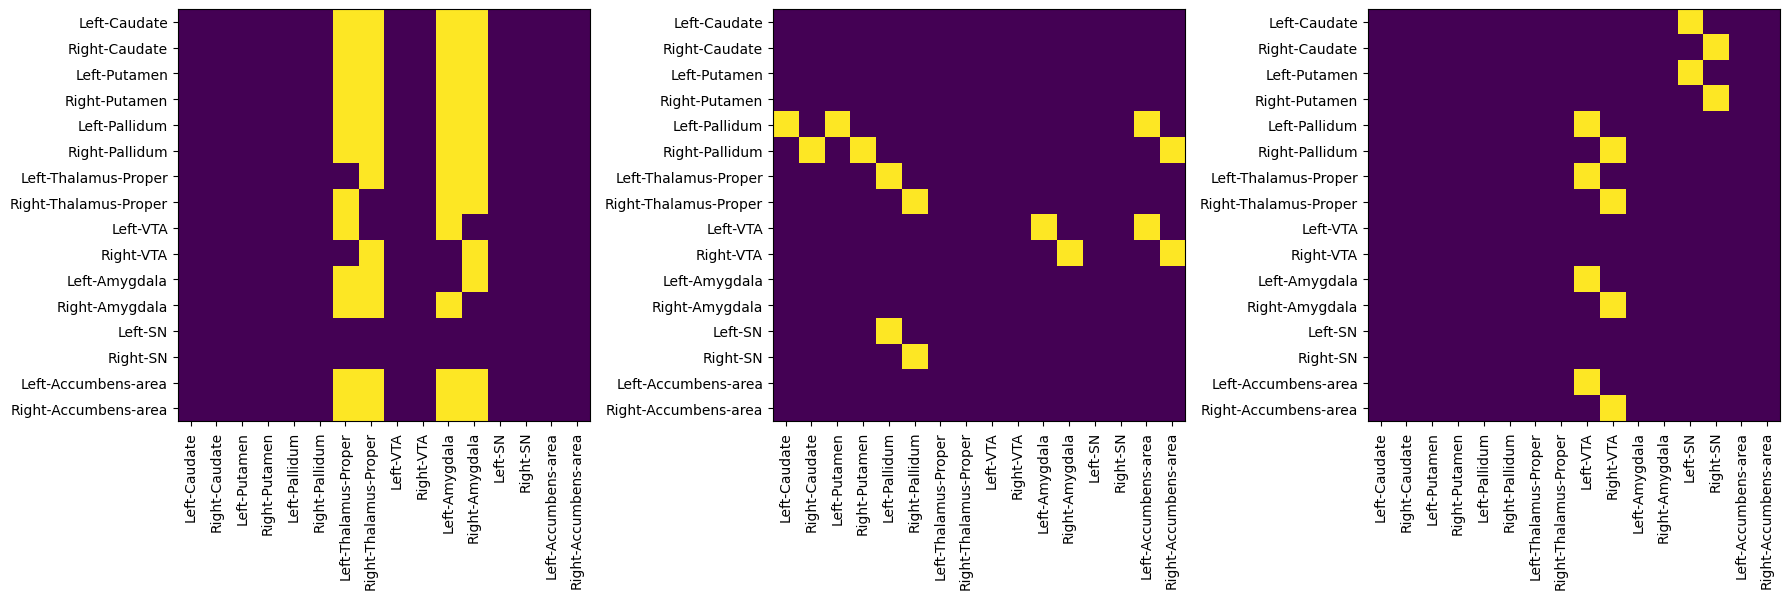

In [106]:
rois = ['Left-Caudate', 'Right-Caudate', 'Left-Putamen', 'Right-Putamen', 'Left-Pallidum', 'Right-Pallidum', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper', 'Left-VTA', 'Right-VTA', 'Left-Amygdala', 'Right-Amygdala', 'Left-SN', 'Right-SN', 'Left-Accumbens-area', 'Right-Accumbens-area']
rois_idx = [regions_names.index(i) for i in rois]

Cem_reduced = Ce_mask_m[rois_idx, :][:, rois_idx]
Cim_reduced = Ci_modified_mask[rois_idx, :][:, rois_idx]
Cd_reduced = Cd_modified_mask[rois_idx, :][:, rois_idx]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(132)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(rois)), rois)
plt.tight_layout()

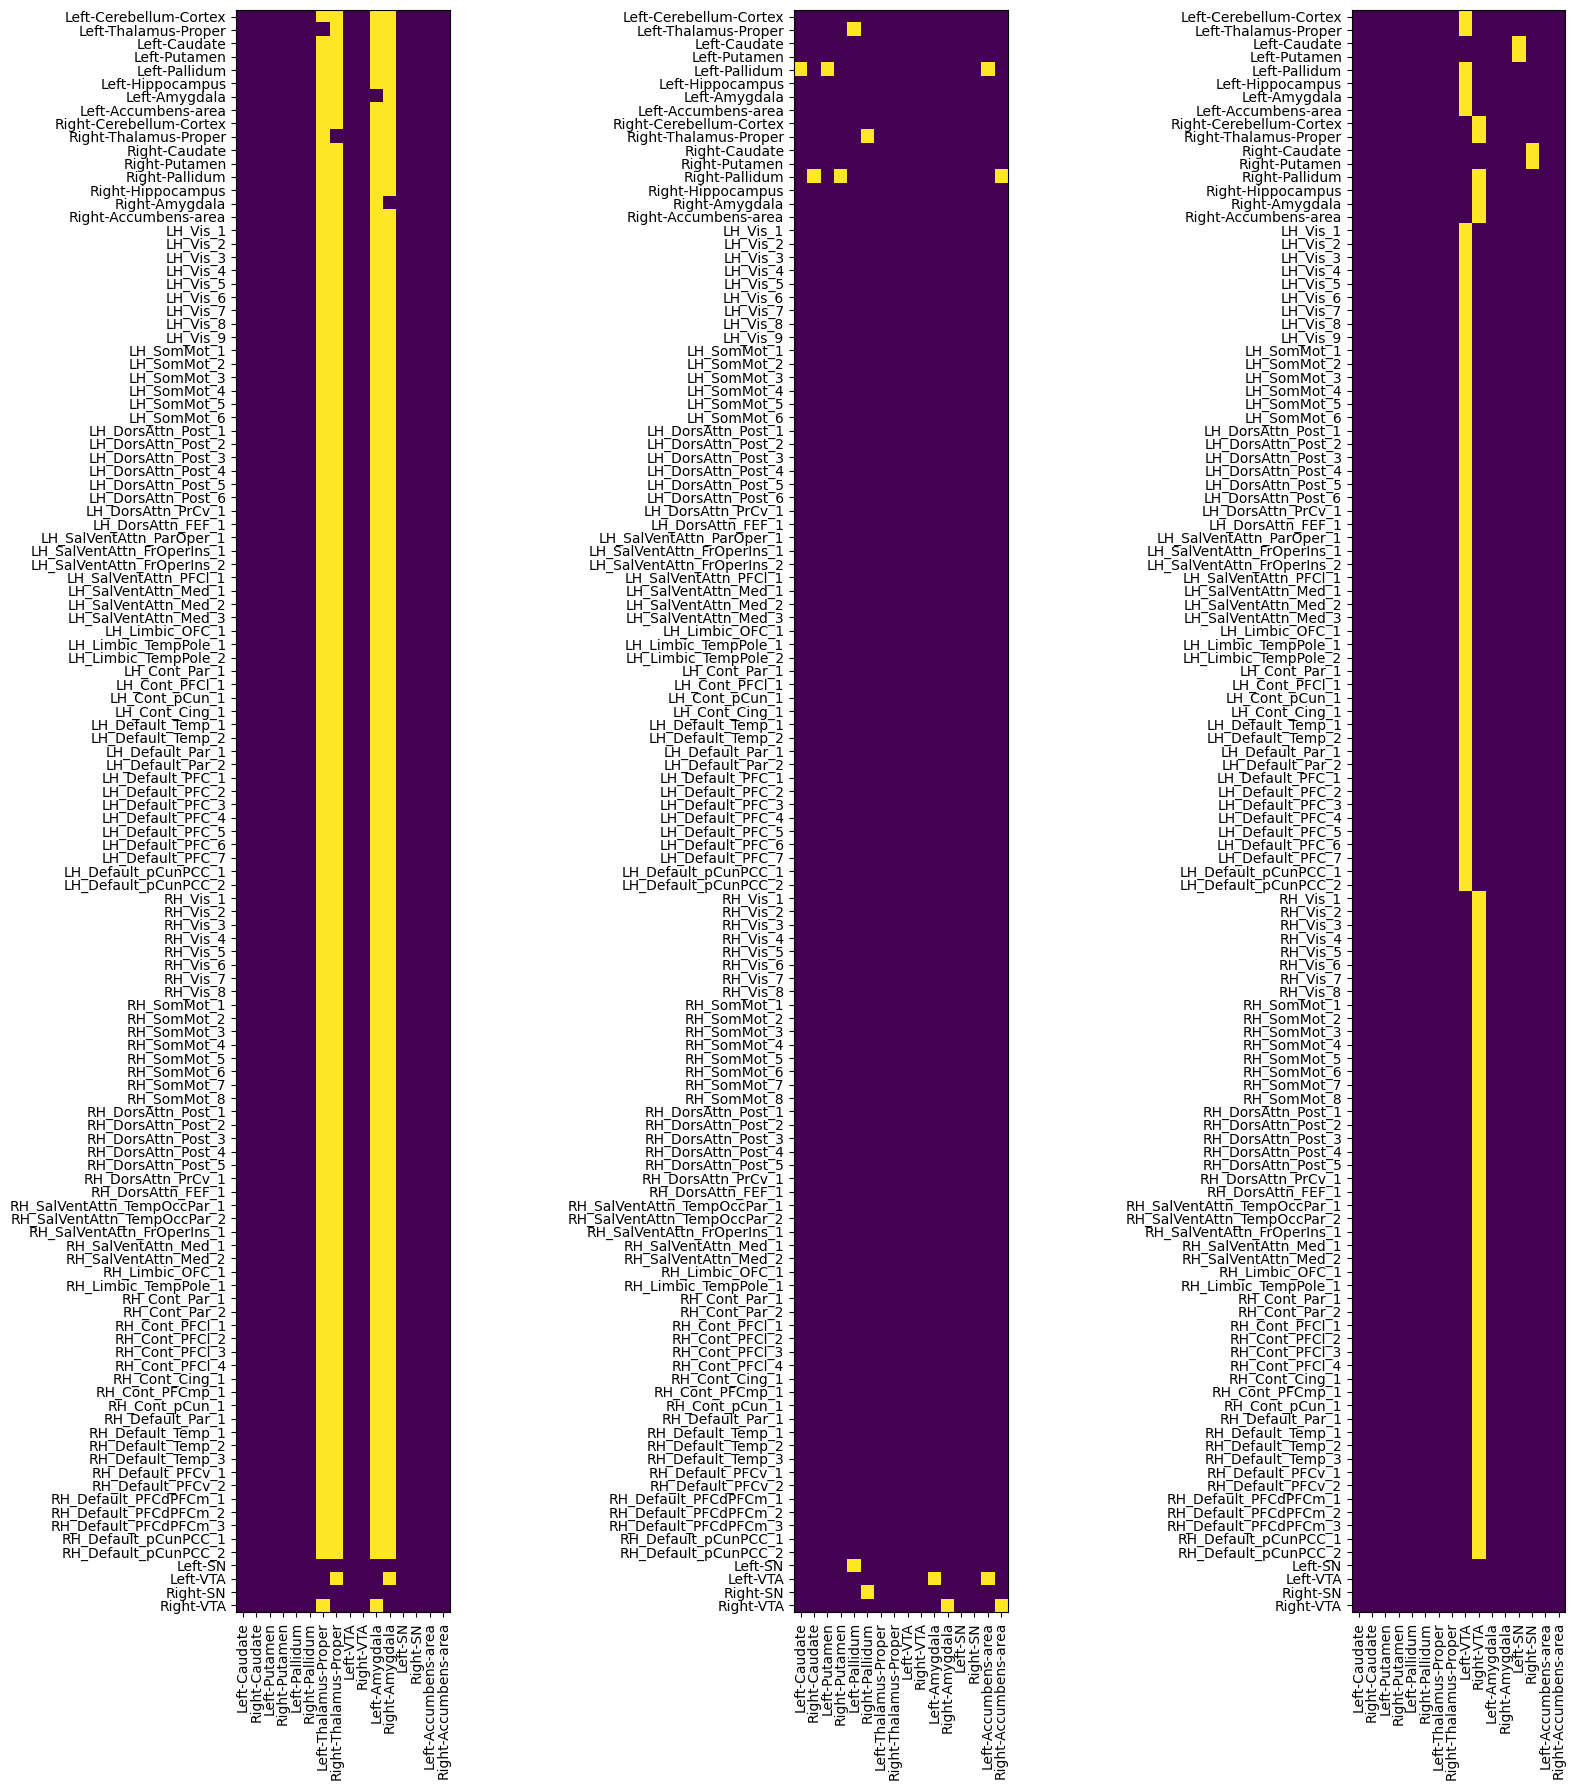

In [99]:
Cem_reduced = Ce_mask_m[:, rois_idx]
Cim_reduced = Ci_modified_mask[:, rois_idx]
Cd_reduced = Cd_modified_mask[:, rois_idx]

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(Cem_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(132)
plt.imshow(Cim_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.subplot(133)
plt.imshow(Cd_reduced)
plt.xticks(np.arange(len(rois)), rois, rotation=90)
plt.yticks(np.arange(len(regions_names)), regions_names)
plt.tight_layout()

In [107]:
np.save('schaefer_exc_mask.npy', Ce_mask_m)